
# Dimensionality reduction of large amounts of data


##### Candidates: 10172, 10042 og 10108
Group number: 1349

25. mars - 8. april

### Summary

In our project, we have applied the NMF method to a dataset of images, which contains a sample of 500 out of 10 000 CryptoPunks images. In the beginning, we applied the NMF on and investigated four small matrices, where we found that the increasing our d-value resulted in smaller norms. The result is reasonable considering d determines the number of columns in $W$ and the number of rows in $H$. For the matrices $A_3$ and $A_4$, we observed how the Frobenius norm decreased as the value d increased. With a smaller norm value, it indicated that the resulting reconstruction $WH$ was more accurate and similar to the original matrix $A$. 

After investigating the smaller matrices, we applied the NMF to the sample of 500 CryptoPunks images. Every CryptoPunks images is a 24 x 24 pixel images with four channels, which are three color channels (RGB), and an opacity channel. By applying the NMF to the dataset of CryptoPunks, it is factorized into the two matrices $W$ and $H$. $W$ contains all the basis vectors, and plotting $W$ shows that these basis vectors are a unique facial feature or element on the CryptoPunks. Some examples are hairstyles, lip colors, piercings and the cigarette. By varying the value of d, it affected how detailed the features were in $W$, where small d-values resulted in the loss of smaller details such as an earring. Furthermore, the Frobenius norm decreased as the value of d increased. When the d-value was higher than the rank of $A$, the rate of improvement of the norm value decreases. This was reasonable since the rank of $A$ are all the non-zero eigenvalues, representing every unique facial feature in the dataset, and $W$ containing the basis vectors.

In the last part, noise is added to the original matrix $A$. Thereafter NMF is applied to the noisy version of $A$. In the reconstruction $WH$, there is less noise than the original noisy $A$ if the d-value is below and around 128. To show the concepts of underfitting and overfitting, we plotted the norm $|| A_{non-noisy} - W H_{noisy}||_{F}$ as function of d. Underfitting occured for d-values below 128, which can be explained with the NMF cannot capture smaller details and complexities in our noisy dataset. Meanwhile, increasing the d-value above 128 resulted in overfitting, where the unwanted noise is also reconstructed in $WH$. This shows the use of NMF can be advantageous to remove noise in datasets, given that a reasonable value for d is chosen. 

### Introduction 


In the last couple of decades our world has become more and more digitalized. Technology is evolving at a high speed and as a consequence, there is a lack of space for all this data and information. We have been introduced to the NMF method where we can control our amount of data and we are going to experiment with it on a set of CryptoPunks. CryptoPunks is an NFT collection containing 10 000 images that all depict the face of a punk. These punks all have different looks, but there are similarities between them as well. These similarities can be saved using the NMF method in a new dataset $W$ and together with a dataset $H$, they can recreate the original dataset $A$ with the CryptoPunks. Depending on the sizes of the datasets $W$ and $H$, they can together include more or less data than the original dataset. We are going to take a look at the different results depending on this size. How can the recreation be as good as possible with the smallest amount of used data as possible? Can this method even make the results better than the original?


### Theory 

There are several methods for dimensionality reduction while using matrix factorization. The method we are to use in this project is called the Non-negative Matrix Factorization, NMF. In this method a non-negative m x n matrix, $A$, is decomposed into two matrices, $W$ and $H$; $A \approx A_{NMF} = WH$. These two matrices are both non-negative, and $W$ is a m x d matrix while $H$ is a d x n matrix. In addition, we can think of the columns of $W$ as the basis vectors of the range of $A$; they might also be called "clusters". The columns of $H$ can be thought of as the weights or coefficients for the columns of $W$ seeing as each column of $A$ is a linear combination of these, $a_i = Wh_i$. 

To obtain the NMF of a m x n matrix $A$ you need to solve a constrained optimization problem by finding the matrix $W$ and the matrix $H$. We can write this as the $\min\limits_{W,H} \lVert A - WH \rVert_F$, where $\lVert \cdot \rVert_F$ is the Frobenius norm. The Frobenius norm tells us about the difference between two matrices. Solving this can be difficult, especially because the approximation is non-unique. That means that $W$ and $H$ have infinitly possible solutions.

However, there are several benefits to using the NMF as opposed to other methods. The method is able to reduce the amount of data in a dataset so that it may be more managable for the user, which is of great value due to the overwhelming amount of data available in the world today. In addition, due to the way the method works you can find the clusters of the dataset; the columns of $W$. This information can be of great importance because it can help with gaining a bigger understanding for the information in the dataset as well as making predictions. The NMF can also help with problems that contains denoising. 

In this project we will examine a dataset containing images. Every image $v$ will be represented as a discrete vector. We can use the NMF for this as it makes sense to try to decompose an image into a combination of other images, and in addition, an image is non-negative. However, firstly, we need to find a way to represent the information of the images. This can be done by using NumPy arrays. Each image has a resolution that can be represented by its width $m_x$ and height $m_y$. Furthermore, the image consists of several small elements called pixels. In our project, every pixel will have three color channels; red, green and blue (this is also called the RGB model). So, every color in the image is represented by a linear combination of these three colors. Hence, an image can be represented by a $m_x \times m_y \times 3$ NumPy array.

When working with images, the Frobenius norm will be a method to measure the difference between the two images. Or, in our case, the difference between $A$ and $A_{NMF}$. However, the Frobenius norm only considers how much the pixel values have changed. This is something to keep in mind as a slight difference in skin color may give a bigger difference in norm than if a face lost an eye. But, the human eye notices the lost eye rather than the small change in skin color. The Frobenius norm can be expressed as: $$\lVert A - WH \rVert_F \rightarrow \lVert A - A_{NMF} \rVert_F = (\sum_{i=1}^{m}\sum_{j=1}^{n}\lvert a_{ij} - a^{NMF}_{ij}\rvert^2)^{1/2}$$.



### Import

In [2]:
%matplotlib inline
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from numpy.linalg import solve, norm  

#import given
import numpy as np
import matplotlib.pyplot as plt

%pip install opencv-python
import cv2

import os
import time


Note: you may need to restart the kernel to use updated packages.


## Task 1 

Before we experiment with large amounts of data, we want to ensure that our method and algorithm works the way we intend it to. We take a closer look at the NMF method and its iterations. What can we expect from changing the initialized values? First, we begin with small matrices and analyze the resulting $W$, $H$ and the recreated $A$ as well as the Frobenius norm for each matrix. The results will depend on the size of $W$ and $H$, and we will analyze the effect of varying the d-values.


#### Task 1a


The next values for the $W$ and $H$ matrix is found from these expressions:

$$ H_{k+1} =  H_{k} ⊙ (W_{k}^{T} \cdot A) ⊘ (W_{k}^{T} \cdot W_{k} \cdot H_{k}) \\ $$ 
$$ W_{k+1} =  W_{k} ⊙ (A \cdot H_{k+1}^{T}) ⊘ (W_{k} \cdot H_{k+1} \cdot H_{k+1}^{T}) $$

We assume that $A$ is non-negative and that $W$ and $H$ are initialized as positive. The algoritm update will give us $H_{1}$ and $W_{1}$ from the initialized $H_{0}$ and $W_{0}$. We then use every new result of $H$ and $W$ to find the next value until we find the k'th value.

First, we will present some definitions and arguments.

Definitions:
  
<ul>
<li> Element-wise multiplication of matrices are denoted as (⊙), where each element in a matrix is multiplied with the element with corresponding indexes of another matrix. This is also known as Hadamard product.<p>

<li> Element-wise division of matrices are denoted as (⊘), where each element in a matrix is divided with the element with corresponding indexes of another matrix. This operation is known as Hadamard division.<p>

<li> Matrix multiplication is denoted as (⋅). Every element in the resulting matrix has an index i and j that indicates the row number and the colomn number. The value in this element is given from a vector multiplication of the i'th row in the first matrix and the j'th colomn in the second matrix. <p>
</ul>
Arguments:

<ul>
<p>i) The product of multiplication will be negative if one factor is negative, given the other factors are positive. The product of multiplication will be positive if all given factors are positive.

<p>ii) Similar with addition, the sum will be negative if a term is negative and the absolute value of it is larger than the other term.

<p>iii) The quotient in a division will remain positive if the dividend and divisor are positive. A fraction will remain positive if the numerator and denominator are positive.

<p>iv) When a matrix is initialized as positive, the values remain positive after transposing the matrix.
</ul>

<p>If we start with the next iteration for $H$: Each position in the previous matrix $H$ is first element-wise multiplied with the matrix product $ W_{k}^{T}  A $.   $ W_{k} $ is initialized as positive and the values remain positive after transposing the matrix (iv).  Matrix multiplication of two matrices is a combination of the operations multiplication and addition. In arithmetic, the product will be negative if one factor is negative, given the other factors are positive (i). Similar with addition, the sum will be negative if a term is negative and the absolute value of it is larger than the other term (ii).  Since $A$ is initialized as positive, the positive numbers will remain positive after matrix multiplication. $A$ is also never changed, so it is always the initialized positive matrix. Furthermore, given that all the numbers are initialized as positive, the multiplication of $ H_{k} $ and $ W_{k}^{T} \cdot A $ will remain positive. Similar to $ W_{k}^{T} \cdot A $, the same arguments and reasons for only positive elements apply to $W_{k}^{T} \cdot W_{k} \cdot H_{k}$, given that the initialized values are positive. 
    
<p>In a similar fashion to multiplication, the quotient in a division will remain positive if the dividend and divisor are positive (iii). Therefore, in element-wise division of the expression ($ (H_{k} ⊙ (W_{k}^{T} \cdot A)) ⊘ (W_{k}^{T} \cdot W_{k} \cdot H_{k}) $), the matrix will only contain positive elements because the initialized values are positive. Every element in every next iteration of $H$ may not be integers since a division also can result in fractions, but a fraction is also positive as long as the numerator and denominator are positive (iii).
We have now proven that $H_{1}$ will be positive when $H_{0}$, $ W_{0} $ and $A$ is initialized as positive. Since $H_{k+1}$ depends on $ W_{k}$, we also have to prove that every $ W_{k+1}$ will remain positive when the initial values in the matrix is positive.
    
<p>Now we will continue and prove that the next iteration of $W$, $W_{k+1}$ will be positive. $W_{k}$ is initialized as positive and the matrix multiplication $A \cdot H_{k+1}^{T}$ will also be positive, from the arguments (i) and (ii).  $A$ is initialized as positive and remains unchanged throughout the process.  Above, we have proven that the next iteration for $H$; $H_{k+1}$ will be positive as long as the previous $W_{k}$ is positive. For $W_{1}$ that will be $W_{0}$, our positive initialization. The transpose of this positive $H_{k+1}$ will also be positive (iv). This concludes that the first step, $ W_{k} ⊙ (A \cdot H_{k+1}^{T})$, is positive. The next step is to element-wise divide (⊘) this matrix by $W_{k} \cdot H_{k+1} \cdot H_{k+1}^{T}$. As previously mentioned, this expression will be positive as it includes the previous $W$, which is positive, and $H_{k+1}$ and $H_{k+1}^{T}$,  are positive since the previous $W$ is positive. As previously argued, matrix multiplications will remain positive if the matrices are positive (i) (ii). The division of $W_{k} ⊙ (A \cdot H_{k+1}^{T}) $ by $ W_{k} \cdot H_{k+1} \cdot H_{k+1}^{T}$ will also remain as a positive matrix (iii). $W_{k+1}$ may not only include integers, but it will be positive for each step as long as $H_{k+1}$ is positive.

<p>All the iterates of $W_{k}$ and $H_{k}$ depend on one another. Therefore, when all the initialized matrices are positive, every step of $H_{k+1}$ , as well as every step of $W_{k+1}$ will be positive. After $k$ iterations, both $W_{k}$ and $H_{k}$ will be non-negative.


#### Task 1b

We have the expression $ H_{k+1} =  H_{k} ⊙ (W^{T} A) ⊘ (W^{T} W H_{k})$ to calculate the next iteration of $H$ . 


If $(W^{T} A) ⊘ (W^{T} W H_{k})$ is a matrix of ones, then we have the following:  

$$H_{k+1} =  H_{k} ⊙ (W^{T} A) ⊘ (W^{T} W H_{k})  =  H_{k} ⊙ \begin{bmatrix} 1 \; ... \; 1 \\  : \; 1 \; : \\  1 \; ... \; 1 \end{bmatrix} $$ 

The symbol ⊙ represents as before, element-wise multiplication of two matrices. The multiplication is not a matrix multiplication, but a multiplication of every element in the two matrices individually, shown below with two arbitrary matrices $A$ and $B$.
$$ A ⊙ B = \begin{bmatrix} a_{11} \; ... \; a_{n1} \\  : \; ... \; : \\  a_{1n} \; ... \; a_{nn} \end{bmatrix}⊙\begin{bmatrix} b_{11} \; ... \; b_{n1} \\  : \; ... \; : \\  b_{1n} \; ... \; b_{nn} \end{bmatrix} = \begin{bmatrix} a_{11}b_{11} \; ... \; a_{n1}b_{n1} \\  : \; ... \; : \\  a_{1n}b_{1n} \; ... \; a_{nn}b_{nn} \end{bmatrix} $$
\
Multiplication with the number 1 will result in the same value as before. This leads to the result: 

$$ H_{k+1} = H_{k} ⊙ \begin{bmatrix} 1 \; ... \; 1 \\  : \; 1 \; : \\  1 \; ... \; 1 \end{bmatrix} =  \begin{bmatrix} h_{11}1 \; ... \; h_{n1}1 \\  : \; . \; : \\  h_{1n}1 \; ... \; h_{nn}1 \end{bmatrix} = \begin{bmatrix} h_{11} \; ... \; h_{n1} \\  : \; . \; : \\  h_{1n} \; ... \; h_{nn} \end{bmatrix} = H_{k} $$

We have now confirmed that $H_{k+1} =  H_{k}$ if $(W^{T} A) ⊘ (W^{T} W H_{k})$ is a matrix of ones ◻



Now we will discuss when this situation, $(W^{T} A) ⊘ (W^{T} W H)$ is a matrix of ones, can occur:

$$ (W^{T} A) ⊘ (W^{T} W H) = \begin{bmatrix} 1 \; ... \; 1 \\  : \; 1 \; : \\  1 \; ... \; 1 \end{bmatrix} $$

The expression $(W^{T} A) ⊘ (W^{T} W H)$ is an element-wise division, and can be expressed as:

$$ (W^{T} A) ⊘ (W^{T} W H) = \frac{W^{T} A}{W^{T} W H} $$


$W^{T}$ is found in both the nominator and denominator of the fraction. Since (⊘) is element-wise division and not matrix division of  two matrices, then both $W^{T}$ cancel each other out. Thus we are left with:

$$ (W^{T} A) ⊘ (W^{T} W H) = \frac{W^{T} A}{W^{T} W H} =  \frac{A}{W H} = \begin{bmatrix} 1 \; ... \; 1 \\  : \; 1 \; : \\  1 \; ... \; 1 \end{bmatrix} $$

We multiply both sides with $WH$ and are left with:
$$ A = W H \begin{bmatrix} 1 \; ... \; 1 \\  : \; 1 \; : \\  1 \; ... \; 1 \end{bmatrix} $$

As previously argued, every multiplication with 1 will make no changes and the end result is the following:
$$ A = WH  \begin{bmatrix} 1 \; ... \; 1 \\  : \; 1 \; : \\  1 \; ... \; 1 \end{bmatrix} = WH$$

We have now proven that $H_{k+1} =  H_{k}$ if $A = WH$ ◻



#### Task 1c


If we initialize $H_{0}$ and $W_{0}$ to equal matrices containing only zeros, it results in some problems. When we try to find the next $H$: $H_{1}$ it is given as followed:

$$ H_{1} =  H_{0} ⊙ (W_{0}^{T} \cdot A) ⊘ (W_{0}^{T} \cdot W_{0} \cdot H_{0}) \\ $$ 

$A$ has values, but a matrix multiplication with a zero matrix will result in a zero matrix. Every other element in this equation is zero matrices so we are left with: 

$$ H_{1} = \begin{bmatrix} 0 \; ... \; 0 \\  : \; 0 \; : \\  0 \; ... \; 0 \end{bmatrix} ⊙ \begin{bmatrix} 0 \; ... \; 0 \\  : \; 0 \; : \\  0 \; ... \; 0 \end{bmatrix} ⊘ \begin{bmatrix} 0 \; ... \; 0 \\  : \; 0 \; : \\  0 \; ... \; 0 \end{bmatrix} = \begin{bmatrix} 0 \; ... \; 0 \\  : \; 0 \; : \\  0 \; ... \; 0 \end{bmatrix} ⊘ \begin{bmatrix} 0 \; ... \; 0 \\  : \; 0 \; : \\  0 \; ... \; 0 \end{bmatrix}  $$

This is where a major problem occurs, as it is not possible to divide a number by zero, as shown below.

$$ H_{1} = \begin{bmatrix} 0 \; ... \; 0 \\  : \; 0 \; : \\  0 \; ... \; 0 \end{bmatrix} ⊘ \begin{bmatrix} 0 \; ... \; 0 \\  : \; 0 \; : \\  0 \; ... \; 0 \end{bmatrix} = \frac{\begin{bmatrix} 0 \; ... \; 0 \\  : \; 0 \; : \\  0 \; ... \; 0 \end{bmatrix}}{\begin{bmatrix} 0 \; ... \; 0 \\  : \; 0 \; : \\  0 \; ... \; 0 \end{bmatrix}} = \begin{bmatrix} \frac{0}{0} \; ... \; \frac{0}{0} \\  : \; \frac{0}{0} \; : \\  \frac{0}{0} \; ... \; \frac{0}{0} \end{bmatrix}$$

 If we initialize $H_{0}$ and $W_{0}$ to matrices containing only zeros, then the problem will already occur in the calculation of the first iteration of $H$, $H_1$. Since $H_1$ is used to calculate the next iteration of $W$, $W_1$, it is not possible to calculate the next iteration of $W$.  

$$ W_{1} =  W_{0} ⊙ (A \cdot H_{1}^{T}) ⊘ (W_{0} \cdot H_{1} \cdot H_{1}^{T}) $$

This problem will appear every time there is a division by zero, not only if the initializations are zero matrices. To avoid this problem, we add a small $δ ∈ [10−9, 10−6]$ to every element with the value zero in our matrices.  As a result, the problem is avoided and the results are not notably affected since $δ$ is close to zero, yet not exactly zero so the following iterations will work.


#### Task 1d

$$ A_{1} = \begin{bmatrix} 1 \; 0 \\ 0 \; 1 \end{bmatrix}  \quad  A_{2} = \begin{bmatrix} 1 \; 2 \\ 1 \; 1 \\ 1 \; 2 \end{bmatrix} \quad  A_{3} = \begin{bmatrix} 2 \; 1 \; 1 \\ 1 \; 1 \; 1 \\ 1 \; 1 \; 2 \end{bmatrix} \quad  A_{4} = \begin{bmatrix} 2 \; 1 \; 0 \\ 1 \; 2 \; 3 \\ 0 \; 3 \; 3 \end{bmatrix} $$

In [3]:

A1 = np.array([[1,0],[0,1]])
A2 = np.array([[1,2],[1,1],[1,2]])
A3 = np.array([[2,1,1],[2,1,1],[1,1,2]])
A4 = np.array([[2,1,0],[1,2,3],[0,3,3]])

print(f'A3 * A4 : \n {A3*A4}')
print(f'\nA3 @ A4 : \n {A3@A4}\n')
print(f'A3 / A4 : \n {A3/A4}')
print(f'\nA4 / A3 : \n {A4/A3}\n')


A3 * A4 : 
 [[4 1 0]
 [2 2 3]
 [0 3 6]]

A3 @ A4 : 
 [[5 7 6]
 [5 7 6]
 [3 9 9]]

A3 / A4 : 
 [[1.         1.                inf]
 [2.         0.5        0.33333333]
 [       inf 0.33333333 0.66666667]]

A4 / A3 : 
 [[1.  1.  0. ]
 [0.5 2.  3. ]
 [0.  3.  1.5]]



C:\Users\sigrid\AppData\Local\Temp/ipykernel_1828/1146685135.py:8: RuntimeWarning: divide by zero encountered in true_divide
  print(f'A3 / A4 : \n {A3/A4}')


We define our matrices $A_{1}$, $A_{2}$, $A_{3}$ and $A_{4}$, which we use with the NMF algorithm later. In Python, we can utilize several built-in commands to execute operations. For element-wise multiplication of matrices (⊙), we use the command $*$ , for element-wise division (⊘), we use the command $/$, and for matrix mulitplication ($\cdot$), we use the command $@$. To illustrate that Python successfully execute these operations, we print one multiplication, one matrix multiplication and two divisions. 
The two different multiplications give different results, therefore showing that they are two different operations. We have also calculated these numbers manually to ensure that the resulting values are correct for the different methods. The resulting matrices are all positive since $A_{3}$ and $A_{4}$ are all positive, as argued previously. 
When we divide $A_{3}$ by $A_{4}$, the problem of dividing by zero occurs. Python informs us that this does not give accepted values, and we are notified by a message as well. If this occurs in our NMF algorithm, a small δ has been added, as previously described. To illustrate that division works if there are no zeroes in the denominator, we have also divided $A_{4}$ by $A_{3}$. In this case, the zeroes are in the numerator instead of the denominator, and the division works. The resulting matrix includes both integers and decimal numbers/fractions, where all elements are positive since $A_{3}$ and $A_{4}$ are all positive. 

In [4]:

def NMF(V, d=1, delta = 1e-9, maxiter = 1000, seed = 0, name="", printe=False):
    """
    input:
        V: (m,n) input array
        d: integer, Number of components we want to decompose V into, the number of colomns in W
        delta: float, small number for safe division so we do not get division by zero
        maxiter: integer, maximum number of iterations
        seed: integer, random seed
        name: to easier describes what we are printing
    output:
        W: (m,d) array
        H: (d,n) array
        norms: array containing the norm of each iteration
    """

    if seed != 0:                                  #If the initialized seed is different from 0, it will get a new random value
        seed = np.random.seed(seed)
    """
    Elementwise product, Hadamard - we use *
    The matrices must be of the same shapes for it to work
    Elementwise division, Hadamard - we use /
    For matrix multiplicaton - we use @ or np.dot()
    """
    m = np.shape(V)[0]                                                #Number of colomns in matrix V
    n = np.shape(V)[1]                                                #Number of rows in matrix V
    
    #Initialize W_0 and H_0 to positive matrices
    scale = np.sqrt(np.mean(V)/d)                                     #To scale the matrices
                                                     #Initilizes W_0 to include random numbers between 0 and 1 in a matrix mxd
    W_0 = (np.random.uniform(0.0+delta, 1.0, m*d)).reshape(m, d)
                                                     #Initilizes H_0 to include random numbers between 0 and 1 in a matrix dxn
    H_0 = (np.random.uniform(0.0+delta, 1.0, d*n)).reshape(d, n)      

    W_0 = W_0*scale                                                   #Scaling W_0
    H_0 = H_0*scale                                                   #Scaling H_0

    H_k = np.copy(H_0)                                                #Copying initialized value so the original does not change
    W_k = np.copy(W_0)                                                #Copying initialized value so the original does not change
    
    norms = np.zeros(maxiter)                                         #To save the norm of each iteration in an array
    
    frob0 = np.linalg.norm(V - np.dot(W_0, H_0), 'fro')               #Frobenius norm of intialized values
    norms[0] = frob0                                                  #Add the norm for this iteration to our array
    
    for k in range (1, maxiter):                                      #We do a chosen number of iterations
        W_k_tran = np.transpose(W_k)                                  #Transpose W to be used in the next value for H

        H = ( H_k* ((W_k_tran@V)) ) / ((W_k_tran@W_k@H_k))            #The next value for H
        H = np.where(H == 0, delta, H)                  #If any elements in H are zero, we add a deltavalue to prevent problems
        H_tran = np.transpose(H)                                      #Transpose H to be used in the next value for W

        W = ( W_k * ((V@H_tran) )/ ((W_k@H@H_tran)))                  #The next value for W
        W = np.where(W == 0, delta, W)                  #If any elements in W are zero, we add a deltavalue to prevent problems

        

        H_k = np.copy(H)                                              #the "previous" iteration in the next iteration
        W_k = np.copy(W)                                              #the "previous" iteration in the next iteration

        frob = np.linalg.norm(V - np.dot(W, H), 'fro')                #Frobenius norm
        norms[k] = frob                                               #Add the norm for this iteration to our array


    WH = W@H                                                #Finds the matrix mulitplication of W and H that is approximatly A

    frob = np.linalg.norm(V - np.dot(W, H), 'fro')                    #Finds the last norm to plot it 
    
    if printe is not False:
        print(f'Matrix {name}\n A: \n {V} \n W: \n {W} \n H: \n {H} \n WH: \n {WH} \n Frobenius norm: \n {frob} \n')

    return W, H, norms


The function above is the NMF algorithm. We have described the process step-by-step with comments in the code. The function takes in a matrix, a value $d$, delta $\delta$, maxiter, seed and a name as parametres. The goal is to find a matrix $W$ and a matrix $H$, where in the case if they are matrix multiplied will approximately result in $A$. The value $d$ determines the number of colomns in $W$ and the number of rows in $H$. We initialize the first $H$ and $W$, and if any element at any time in the matrices are zero, a delta $\delta$ is added to avoid the problem with dividing by zero. The maxiter sets the maximum number of iterations the algorithm will run to find a new $H$ and a new $W$ by the formulas:

$$ H_{k+1} =  H_{k} ⊙ (W_{k}^{T} \cdot A) ⊘ (W_{k}^{T} \cdot W_{k} \cdot H_{k}) \\ $$ 
$$ W_{k+1} =  W_{k} ⊙ (A \cdot H_{k+1}^{T}) ⊘ (W_{k} \cdot H_{k+1} \cdot H_{k+1}^{T}) $$

The matrices are transposed when needed and as previously discussed, we use * for element-wise multiplication (⊙), @ for matrix multiplication ($\cdot$) and / for element-wise division (⊘). Every time we get a new matrix $H$ and $W$, we calculate the norm between the original matrix and the matrix product $W H$. The information is printed and we return the resulting matrices $H$ and $W$, and an array with the calculated norm for each iteration $k$. 

In [5]:

#Using the NMF algorithm for matrix A1 and d=1
W_A1_d1, H_A1_d1, norms_A1_d1 = NMF(V=A1, d=1, delta=1e-9, maxiter=1000, seed=10, name="A1, d=1", printe=True)

#Using the NMF algorithm for matrix A2 and d=1
W_A2_d1, H_A2_d1, norms_A2_d1 = NMF(V=A2, d=1, delta=1e-9, maxiter=1000, seed=10, name="A2, d=1", printe=True)


Matrix A1, d=1
 A: 
 [[1 0]
 [0 1]] 
 W: 
 [[0.54540606]
 [0.01467384]] 
 H: 
 [[1.83217011 0.04929351]] 
 WH: 
 [[9.99276675e-01 2.68849798e-02]
 [2.68849798e-02 7.23325339e-04]] 
 Frobenius norm: 
 1.0 

Matrix A2, d=1
 A: 
 [[1 2]
 [1 1]
 [1 2]] 
 W: 
 [[0.81009175]
 [0.49441301]
 [0.81009175]] 
 H: 
 [[1.35817337 2.39879274]] 
 WH: 
 [[1.10024505 1.94324222]
 [0.67149859 1.18599434]
 [1.10024505 1.94324222]] 
 Frobenius norm: 
 0.4111546000651088 



We decided to print $A$ as well as all the results to easily compare the $WH$ to the original $A$. Both of the matrices $W$ have $d=1$ number of columns and both of the matrices $H$ have $d=1$ number of rows. The resulting matrix $WH$ for $A_{1}$ is quite different from $A$ in element $(i_{row},j_{column})=(1,1)$, which is bottom right. Here the value is supposed to be close to 1, but it is now closer to zero than the elements $wh_{0, 1}$ and $wh_{1, 0}$, whose values are supposed to be zero,. With this we can conclude that $d=1$ for $A_{1}$ does not result in a good approximation with the NMF. The frobenius norm for $A_{1}$ is 1 as anticipated since we received this as a hint in the statement of the assignment.
The norm describes the difference between $A$ and the resulting $WH$ so we want the norm to be as small as possible.
The resulting matrix $WH$ for $A_{2}$ is close to the values in $A_{2}$ in all its elements. The Frobenius norm is also a smaller value, which indicates a better recreation. 


#### Task 1e

In [6]:

#Uses the NMF algorithm for matrix A1 and d=2
W_A1_d2, H_A1_d2, norms_A1_d2 = NMF(V=A1, d=2, delta=1e-9, maxiter=1000, seed=0, name="A1, d=2", printe=True)

#Uses the NMF algorithm for matrix A2 and d=2
W_A2_d2, H_A2_d2, norms_A2_d2 = NMF(V=A2, d=2, delta=1e-9, maxiter=1000, seed=0, name="A2, d=2", printe=True)


Matrix A1, d=2
 A: 
 [[1 0]
 [0 1]] 
 W: 
 [[1.01926872e-014 2.03374093e-001]
 [4.00137233e-001 6.74350285e-290]] 
 H: 
 [[6.38527194e-014 2.49914259e+000]
 [4.91704714e+000 1.63040893e-288]] 
 WH: 
 [[1.00000000e+00 2.54729786e-14]
 [2.55498505e-14 1.00000000e+00]] 
 Frobenius norm: 
 3.6078629389509636e-14 

Matrix A2, d=2
 A: 
 [[1 2]
 [1 1]
 [1 2]] 
 W: 
 [[0.34386708 0.96957741]
 [0.45621755 0.17925663]
 [0.34386708 0.96957741]] 
 H: 
 [[2.07597952 1.60511617]
 [0.29511722 1.4934892 ]] 
 WH: 
 [[1. 2.]
 [1. 1.]
 [1. 2.]] 
 Frobenius norm: 
 5.874748045952207e-16 




We now take a look at the NMF when $d=2$ for the matrices $A_{1}$ and $A_{2}$. Since $d=2$, $W$ will now have two columns and $H$ two rows instead of one, as we previously observed when $d=1$. The resulting $WH$ when $d=2$ are much closer to the original matrix $A$ for both $A_{1}$ and $A_{2}$. The norms are very small, which means there is only a small difference between the original and the resulting $WH$ after 1000 iterations. Both the norm for $A_{1}$ and $A_{2}$ are close to zero, where the norm for $A_{2}$ being the smallest of the two. This result is reasonable given that $A_{1}$ and $A_{2}$ have two columns each and their corresponding $W$ also has two columns and $H$ has two rows. 

Using the NMF algoritm with a d-value as large as the size of the matrix $A$ gives us a $W$ and a $H$ that has more data than the original matrix. The NMF method is used to reduce the amount of data but in this case we use more. This leads to good results and small norms.


#### Task 1f

In [7]:

def eigenvalue(matrix, name):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)     #numpy command returns the eigenvalues and eigenvectors for the matrix
    print(f'Eigenvalues for matrix {name}: {eigenvalues}')          #Prints the values to doublecheck if any of them are zero
    print(f'Eigenvectors for matrix {name}: \n {eigenvectors}')

    nonZeroEigenvalues = len(eigenvalues)                           #As long as we know now, none of the eigenvalues are zero
    for i in range(len(eigenvalues)):                               #Check every eigenvalue
        if eigenvalues[i] == 0:                 
            nonZeroEigenvalues -= 1                                 #If a eigenvalue are zero, the matrix loses a rank
    
    print(f'Matrix {name} has a rank of {nonZeroEigenvalues}')      #Print the resulting value for rank
    print("\n")

    return eigenvalues, eigenvectors, nonZeroEigenvalues            #Returns all the resulting values

eigenvaluesA3, eigenvectorsA3, rankA3 = eigenvalue(A3, "A3")
eigenvaluesA4, eigenvectorsA4, rankA4 = eigenvalue(A4, "A4")


Eigenvalues for matrix A3: [ 4.00000000e+00  1.00000000e+00 -4.04414586e-16]
Eigenvectors for matrix A3: 
 [[ 0.57735027  0.40824829  0.30151134]
 [ 0.57735027  0.40824829 -0.90453403]
 [ 0.57735027 -0.81649658  0.30151134]]
Matrix A3 has a rank of 3


Eigenvalues for matrix A4: [-0.75770177  2.09911499  5.65858678]
Eigenvectors for matrix A4: 
 [[-0.27264929 -0.94543361  0.17837501]
 [ 0.75188543 -0.09370664  0.65260047]
 [-0.60027549  0.31204863  0.73640681]]
Matrix A4 has a rank of 3




We calculate the rank of $A_{3}$ and $A_{4}$. The rank is defined by the number of non-zero eigenvalues related to the matrix. The function eigenvalue gives us the eigenvalues, the related eigenvectors and the rank of the matrix, which is the number of non-zero eigenvalues. The function np.linalg-eig(matrix) automatically returns the eigenvalues and eigenvectors of a matrix. To evaluate the rank, we check if any of the eigenvalues are zero. For each zero-eigenvalue the matrix loses a rank. 

$A_{3}$ is evaluated to have a rank of 3 by the function. $A_{3}$ is a 3x3 matrix, so a rank of 3 means the colomns in $A_{3}$ are independent. We return and save the eigenvalues and eigenvectors to print them and are ensured that none of the eigenvalues are zero. The same applies to $A_{4}$. $A_{4}$ also has a rank of 3, meaning the colomns are independent.

#### Task 1g

In [8]:

#Uses the NMF algorithm for matrix A3 and the d-values 1, 2 and 3
W_A3_d1, H_A3_d1, norms_A3_d1 = NMF(V=A3, d=1, delta=1e-9, maxiter=1000, seed=0, name="A3, d=1", printe=True)
W_A3_d2, H_A3_d2, norms_A3_d2 = NMF(V=A3, d=2, delta=1e-9, maxiter=1000, seed=0, name="A3, d=2", printe=True)
W_A3_d3, H_A3_d3, norms_A3_d3 = NMF(V=A3, d=3, delta=1e-9, maxiter=1000, seed=0, name="A3, d=3", printe=True)

#Uses the NMF algorithm for matrix A4 and the d-values 1, 2 and 3
W_A4_d1, H_A4_d1, norms_A4_d1 = NMF(V=A4, d=1, delta=1e-9, maxiter=1000, seed=0, name="A4, d=1", printe=True)
W_A4_d2, H_A4_d2, norms_A4_d2 = NMF(V=A4, d=2, delta=1e-9, maxiter=1000, seed=0, name="A4, d=2", printe=True)
W_A4_d3, H_A4_d3, norms_A4_d3 = NMF(V=A4, d=3, delta=1e-9, maxiter=1000, seed=0, name="A4, d=3", printe=True)


Matrix A3, d=1
 A: 
 [[2 1 1]
 [2 1 1]
 [1 1 2]] 
 W: 
 [[0.63535854]
 [0.63535854]
 [0.59484118]] 
 H: 
 [[2.70089865 1.60658209 2.11884762]] 
 WH: 
 [[1.71603901 1.02075564 1.34622792]
 [1.71603901 1.02075564 1.34622792]
 [1.60660574 0.95566119 1.26037782]] 
 Frobenius norm: 
 1.14841379830242 

Matrix A3, d=2
 A: 
 [[2 1 1]
 [2 1 1]
 [1 1 2]] 
 W: 
 [[0.53910681 0.33263718]
 [0.53910681 0.33263718]
 [0.19188298 0.99959023]] 
 H: 
 [[3.50808026 1.40393883 0.70373624]
 [0.32699308 0.73090753 1.8657295 ]] 
 WH: 
 [[2. 1. 1.]
 [2. 1. 1.]
 [1. 1. 2.]] 
 Frobenius norm: 
 4.1540741810552243e-16 

Matrix A3, d=3
 A: 
 [[2 1 1]
 [2 1 1]
 [1 1 2]] 
 W: 
 [[0.35438151 0.13554363 0.4569927 ]
 [0.24156079 0.2777518  0.44632931]
 [0.8840823  0.41581419 0.05916993]] 
 H: 
 [[0.54523981 0.7172081  1.60638936]
 [0.71316313 0.67633657 1.31583594]
 [3.74210019 1.43144806 0.55224565]] 
 WH: 
 [[2.00000009 0.99999972 1.00000009]
 [1.9999999  1.00000028 0.99999991]
 [1.         1.         2.        ]] 


We will now use the NMF algorithm on the matrices $A_{3}$ and $A_{4}$, and analyze the results when the d-value is 1,2 and 3 for both matrices. For matrix $A_{3}$, the best results come from $d=2$, then the Frobenius norm is approximately zero. When $d=1$, it does not yield a good result, and when $d=3$ the error increases again but it is still a good result. For matrix $A_{4}$, the Frobenius norm decreases as the d-value increases. So when $d=3$ for $A_{4}$, it gave the best result, but still not as good as when $d=2$ or $d=3$ for $A_{3}$. There seems to be a situation where the error for $A_{3}$ increases as d increases after $d=2$, but we approximate both these norms to zero since they are so small in value. The resulting recreations $WH$ for $A_{3}$ are excellent and the resulting recreations $WH$ for $A_{4}$ increases in accuracy as the value d increases.


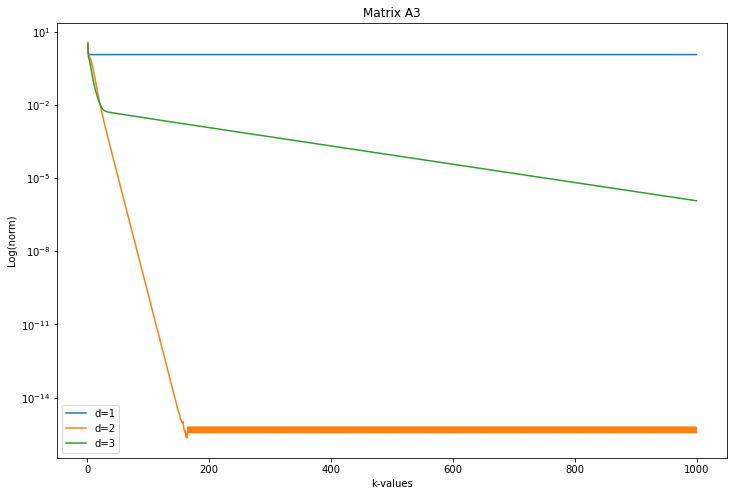

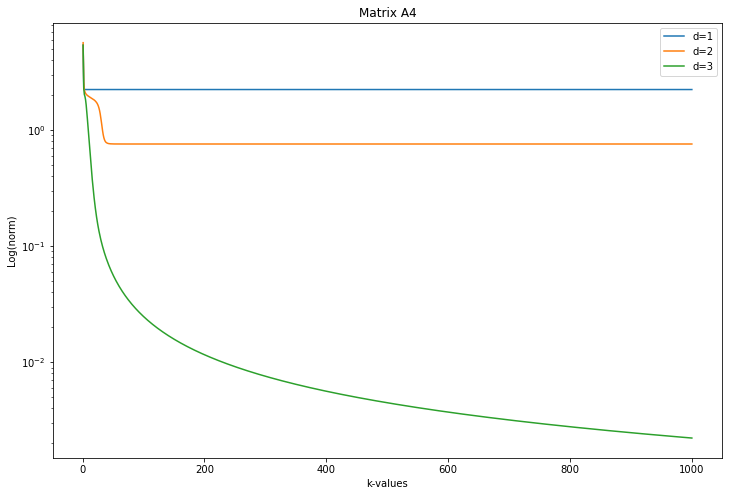

In [23]:

d_list = [1, 2, 3]                                #List of d-values, number of colomns in W

k_values = np.arange(1,1001)         

plt.figure(11)
for i in range(len(d_list)):
    #Applying NMF
    W_1g, H_1g, norms_1g_A3 = NMF(V=A3, d=d_list[i], delta = 1e-9, maxiter = 1000, seed = 0, name="")
    plt.plot(k_values, norms_1g_A3, label=f"d={d_list[i]}")        # Plotting the norm values for all k iterations 
plt.yscale("log")
plt.title("Matrix A3")
plt.xlabel("k-values")
plt.ylabel("Log(norm)")
plt.legend()
plt.rcParams["figure.figsize"]=(12,8)
plt.show()


plt.figure(12)
for i in range(len(d_list)):
    #Applying NMF
    W_1g, H_1g, norms_1g_A4 = NMF(V=A4, d=d_list[i], delta = 1e-9, maxiter = 1000, seed = 0, name="")
    plt.plot(k_values, norms_1g_A4, label=f"d={d_list[i]}")        # Plotting the norm values for all k iterations
plt.yscale("log")
plt.title("Matrix A4")
plt.xlabel("k-values")
plt.ylabel("Log(norm)")
plt.legend()
plt.rcParams["figure.figsize"]=(12,8)
plt.show()


Above, we have used the NMF algoritm with $d = 1$, $d = 2$ and $d = 3$ for $A_3$ and $A_4$. The plots show $\lVert A - W_kH_k \rVert_F$ as a function of the number of iterations $k$. In addition, the y-axis in both plots has been scaled logarithmically. By observing the plots, $\lVert A - W_{k+1}H_{k+1}\rVert_F \le \lVert A - W_kH_k\rVert_F$ is satisfied for $d = 1$, $d = 2$ and $d = 3$ as the graphs decrease for k-values. Therefore, that implies that the algorithm successfully converges to a local minimizer of $\min\limits_{W,H} \lVert A - WH \rVert_F$.

However, the results depend on the value of $d$. As one can see in both plots, using $d = 1$ does not give particularly good results. This coincides with the numbers previously calculated, where we can see that the Frobenius norm is rather big, which means that there is a large difference between the original matrix $A$ and $WH$. For $A_3$, using $d = 2$ results in the smallest and best for the Frobenius norm. However, when the graph reaches its smallest value for the norm, it seems as if it is oscillating; this is due to machine approximation error. The norm value when $d = 3$ for $A_3$ is better than $d = 1$, but not as small as the value from using $d = 1$. We can also observe that the overall values for the Frobenius norm are larger for $A_4$ than $A_3$. The norm value from using $d = 1$ is still the largest one, but from the plot and previous calculations for $A_4$, using $d = 3$ gave better results and smaller norms than using $d = 2$. 


## Task 2 


In our project, $A$ will be represented by a CryptoPunks dataset which contains $N$ number of images. In this case, the columns of $W$ can be interpreted as the basis images for the range of the original matrix A. Meanwhile, H tells us how we should sum up these basis images so that we can try to reconstruct an approximation to an image.

Our CryptoPunks dataset contains 10 000 images. Each image is a 24 x 24 pixels. Using the whole dataset is highly computationally intensive. Therefore in our project, we have chosen to work with a sample of $N$ number of images.We can decide on the number $N$ ourselves, and we have chosen to use $N = 500$, which gives us a sample of 500 images. If we had chosen a larger $N$, it would be more computationally intensive, thus leading to longer runtime as well as different results. If the $N$ had been lower, the runtime would have been shorter, however the results could be warped due to the lack of information from a too small sample, which could greatly affect the values in the columns of $W$. 

In this part of the project we will apply NMF to a dataset of CryptoPunks. This will hopefully let us find the image components of the dataset itself. In addition, we will reassemble the images, $A_{NMF}$, and discuss whether or not the reconstructions are overall good. Furthermore, we will look into how the Frobenius norm $\lVert A - W_kH_k \rVert_F$ differs for different values of d. 


#### Task 2a

In [37]:

def load_images(N):
    """
    Loads images from cryptopunk dataset. The loading order is deterministic,
    so for a certain N the exact same images will be loaded. 
    Input:
        N, integer, number of images to load
    Output:
        faces, (24,24,4,N) numpy array containing images
    """

    # Allocate array to store images
    faces = np.zeros((24,24,4,N))

    # Iteration variable
    i = 0

    # Iterate over folders
    for subdir, dirs, files in os.walk('./imgs'):

        # Iterate over files
        for file in files:

            # Filepath to load from
            filepath = subdir + os.sep + file

            # Make sure that the file is a .png
            if filepath[-3:] == 'png':

                # Load the image
                im = cv2.imread(filepath, cv2.IMREAD_UNCHANGED)

                # Convert it to RGBA and rescale pixels
                faces[:,:,:,i] = cv2.cvtColor(im, cv2.COLOR_BGRA2RGBA)/255.0

                i+=1
            if i == N:
                break
    return faces

# Number of faces to keep in final array
N = 500

# Load all 10000 images
faces = load_images(10000)

# Select N random images
choices = np.random.choice(faces.shape[-1],N, replace = False)
faces = faces[:,:,:,choices]

# Check that the shape is correct
print(f'Information about the faces: {faces.shape} ')
print("First and second element are for the grid because the image size is 24 x 24 pixels, the third element contains the three color channels (RGB) and opacity channel, and the fourth element are N number of faces")


Information about the faces: (24, 24, 4, 500) 
First and second element are for the grid because the image size is 24 x 24 pixels, the third element contains the three color channels (RGB) and opacity channel, and the fourth element are N number of faces


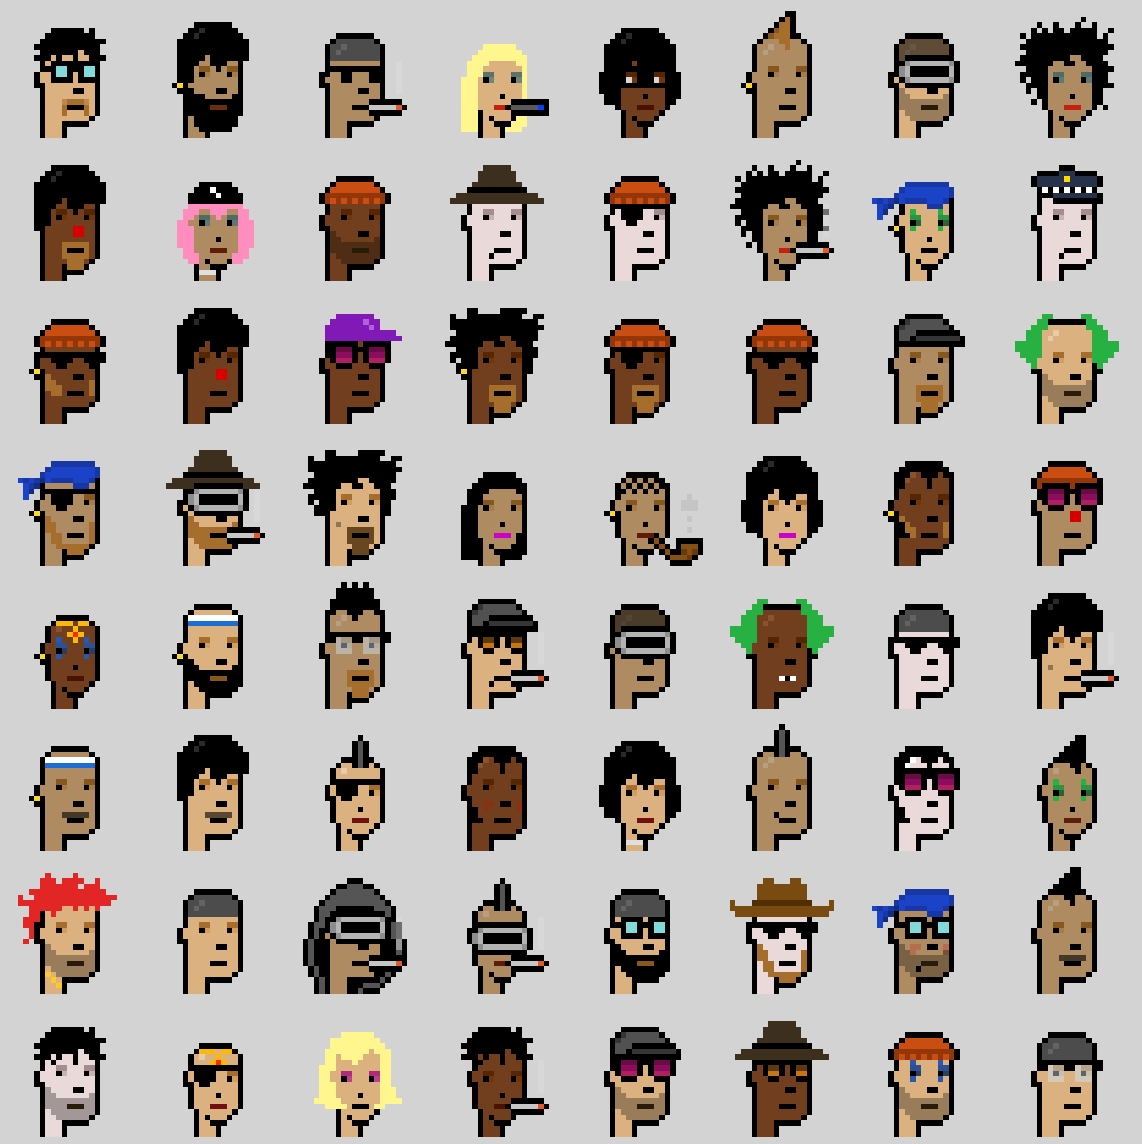

In [38]:

# Code for plotting images
def plotimgs(imgs, nplot = 8, rescale = False, filename = None):
    """
    Plots nplot*nplot images on an nplot x nplot grid. 
    Saves to given filename if filename is given
    Can also rescale the RGB channels
    input:
        imgs: (24,24,4,N) or (24,24,3,N) array containing images, where N > nplot**2
        nplot: integer, nplot**2 images will be plotted
        rescale: bool
        filename: string, figure will be saved to this location. Should end with ".png".
    """
    # We will change some of the parameters of matplotlib, so we store the initial ones
    oldparams = plt.rcParams['figure.figsize']

    # New params to make better plot. There definitely exists better ways of doing this
    plt.rcParams['figure.figsize'] = (16, 16)

    # Initialize subplots
    fig, axes = plt.subplots(nplot,nplot)

    # Set background color
    plt.gcf().set_facecolor("lightgray")

    # Iterate over images
    for idx in range(nplot**2):
        
        # Indices
        i = idx//nplot; j = idx%nplot

        # Remove axis
        axes[i,j].axis('off')

        # Rescale RGB channels by dividing my maximal value
        if rescale:
            scaled_img = np.copy(imgs[:,:,:,idx])
            scaled_img[:,:,:3] = scaled_img[:,:,:3]/np.max(scaled_img[:,:,:3])
            axes[i,j].imshow(scaled_img)
        else:
            axes[i,j].imshow(imgs[:,:,:,idx])
    
    # Tight layout so images will appear closer together
    plt.tight_layout()

    # Save if filename is given
    if filename is not None:
        plt.savefig(filename)

    plt.show()

    # Return to old parameters
    plt.rcParams['figure.figsize'] = oldparams



# Example of plotting 8 times 8 images stored in "faces" and saving the output to a file named "punks.png"
plotimgs(faces, 8, filename="punks.png")


In [26]:

# Split the images into opacity and rgb channels
faces_opacity = faces[:,:,3,:]
faces_rgb = faces[:,:,:3,:]
shape = faces_rgb.shape
faces_opacity_shape = faces_opacity.shape

# Clever reshape "trick". This is the matrix we will apply the NMF to
faces_reshaped = faces_rgb.reshape(np.prod(shape)//N, N)
print(f'Faces reshaped size: {faces_reshaped.shape}')


Faces reshaped size: (1728, 500)


Here we have plotted 64 different images from our sample of $N$ images on a 8 x 8 grid. First, the images had to be uploaded from the CryptoPunk dataset. In addition, the way they are uploaded are deterministic so for a given $N$ the same images will be uploaded every time. 


#### Task 2b

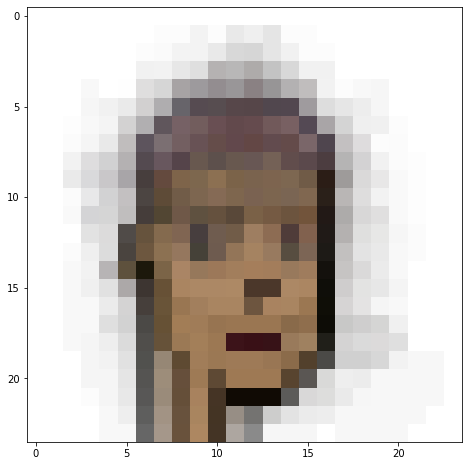

In [32]:

def pixel_color_mean(V=faces):
    
    matrix_face = np.copy(V)                #Copying the original dataset
    shape = V.shape                         #The shape of the original dataset
    
    result = np.zeros(((shape[0], shape[1], shape[2])))          #Creating array for the resulting image 24 x 24 with 4 channels
    
    arr = np.zeros(shape[3])            #Array with N elements, later used to calculate the mean of each color channel and pixel
    
    for k in range(shape[2]):                                    # For-loop for every channel (4)
        for i in range(shape[0]):                                # Pixel row no. i {row}, (24)
            for j in range(shape[1]):                            # Pixel no. j in row i {column}, (24) 
                for n in range(shape[3]):                        # Picture no. n out of N
                    el = matrix_face[i][j][k][n]                 # The value in image n for color channel k, pixel no. i*j
                    arr[n] = el                                  # adding all N values of a certain pixel to an array
                    
                mean = np.mean(arr)                              # calculating the mean for the array above
                result[i][j][k] = mean                           # adding all the means
                
    return result

mean_image = pixel_color_mean(faces)

def imshow_plot(matrix=mean_image, filename=None):               #To save the figure if we want
    plt.imshow(mean_image)
    if filename is not None:
        plt.savefig(filename)

imshow_plot(mean_image, "test2b_2.png")           #Plotting the mean face for the cryptopunks


The image above is the mean of the uploaded dataset. This gives us valuable information about the images, and what they have in common. For example, we can see that they mostly have the same face shape as well as roughly the same height for the eyes, nose, ears and mouth. The neck and the hair, however, seems to differ at bit more than the other features. One can clearly see that the pixels around the head are different shades of black and gray. This is caused by the different hair styles and headwear the different CryptoPunks have. Nevertheless, one can observe that the scalp has a dark shade of pink. This is probably due to the different hair colors as well as the different types and colors of headwear. In addition, we see the outline of a cigarette since multiple punks smoke and we see a brighter pixel where some punks have a piercing. Some of the punks have beards, which we also can see a hint of.

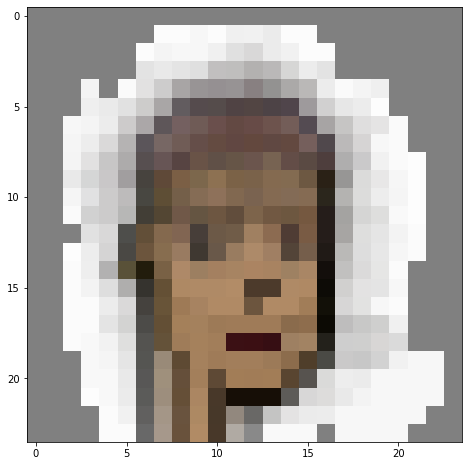

In [28]:

def pixel_color_mean_opacity(V=faces):
    
    matrix_face = np.copy(V)                #Copying the original dataset
    shape = V.shape                         #The shape of the original dataset
    
    result = np.zeros(((shape[0], shape[1], shape[2])))          #Creating array for the resulting image 24 x 24 with 4 channels
    
    arr = np.zeros(shape[3])            #Array with N elements, later used to calculate the mean of each color channel and pixel
    
    for k in range(shape[2]):                                    # For-loop for every channel (4)
        for i in range(shape[0]):                                # Pixel row no. i {row}, (24)
            for j in range(shape[1]):                            # Pixel no. j in row i {column}, (24) 
                for n in range(shape[3]):                        # Picture no. n out of N
                    el = matrix_face[i][j][k][n]                 # The value in image n for color channel k, pixel no. i*j
                    arr[n] = el                                  # adding all N values of a certain pixel to an array
                    
                mean = np.mean(arr)                              # calculating the mean for the array above
                result[i][j][k] = mean                           # adding all the means
    
    show_zero_opacity = np.copy(result)
    
    for i in range(shape[0]): # Pixel row no. i {row}, (24)
        for j in range(shape[1]): # Pixel no. j in row i {column}, (24) 
            if show_zero_opacity[i][j][3] == 0: # Checking if opacity is zero for a certain pixel
                show_zero_opacity[i][j][3] = 0.5 # If opacity is zero, give a high value to show in a plot where there is no opacity
                
    return result, show_zero_opacity


mean_image, show_zero_opacity = pixel_color_mean_opacity(faces)

def imshow_plot(matrix=mean_image, filename=None):               #To save the figure if we want
    plt.imshow(matrix)
    if filename is not None:
        plt.savefig(filename)

imshow_plot(show_zero_opacity, "show_zero_opacity.png")


After iterating through every image and finding the mean, there are some pixels that have no opacity for all images. These pixels are highlighted by the grey color in the plot above. As one can see these pixels are mostly close to the edges and border of the image. 


In [39]:

faces_rank = faces[:,:,:-1,:].reshape((24*24*3,N))
unitArray1, vectorsSingVal, unitArray1 = np.linalg.svd(faces_rank)
print(f"The rank of the original matrix with N=500 faces: {np.argwhere(vectorsSingVal>10**(-12)).shape[0]} ")
print("This value depends on which small value we approx to zero, we chose 10^(-12) \n")

def rank(limit):
    return np.argwhere(vectorsSingVal>10**(limit)).shape[0]

print("Testing different limits and their resulting rank:")
print(f"Limit=10^(-14) -> rank = {rank(-14)} \nLimit=10^(-13) -> rank = {rank(-13)} \nLimit=10^(-12) -> rank = {rank(-12)}")
print(f"Limit=10^(-10) -> rank = {rank(-10)} \nLimit=10^(-8)  -> rank = {rank(-8)} \nLimit=10^(-4)  -> rank = {rank(-4)}")
print(f"Limit=10^(-3)  -> rank = {rank(-3)} \nLimit=10^(-2)  -> rank = {rank(-2)} \nLimit=10^(-1)  -> rank = {rank(-1)}")

The rank of the original matrix with N=500 faces: 376 
This value depends on which small value we approx to zero, we chose 10^(-12) 

Testing different limits and their resulting rank:
Limit=10^(-14) -> rank = 498 
Limit=10^(-13) -> rank = 376 
Limit=10^(-12) -> rank = 376
Limit=10^(-10) -> rank = 376 
Limit=10^(-8)  -> rank = 376 
Limit=10^(-4)  -> rank = 376
Limit=10^(-3)  -> rank = 371 
Limit=10^(-2)  -> rank = 343 
Limit=10^(-1)  -> rank = 270


We find the rank of the matrix containing the images using np.linalg.svd and retrieve the number of non-zero eigenvalues as we did for the matrices $A_{3}$ and $A_{4}$. No eigenvalue is originally zero, but some of them are such small numbers that they are approximately zero. The eigenvalues that we approximate to zero are of a value smaller than $10^{-13}$. All the other eigenvalues are bigger than $10^{-3}$, so we conclude that the rank for the original matrix with the faces is 376. This means that there are 376 unique faces in the total of 500 faces and the remaining faces are combinations of these unique faces.

#### Task 2c

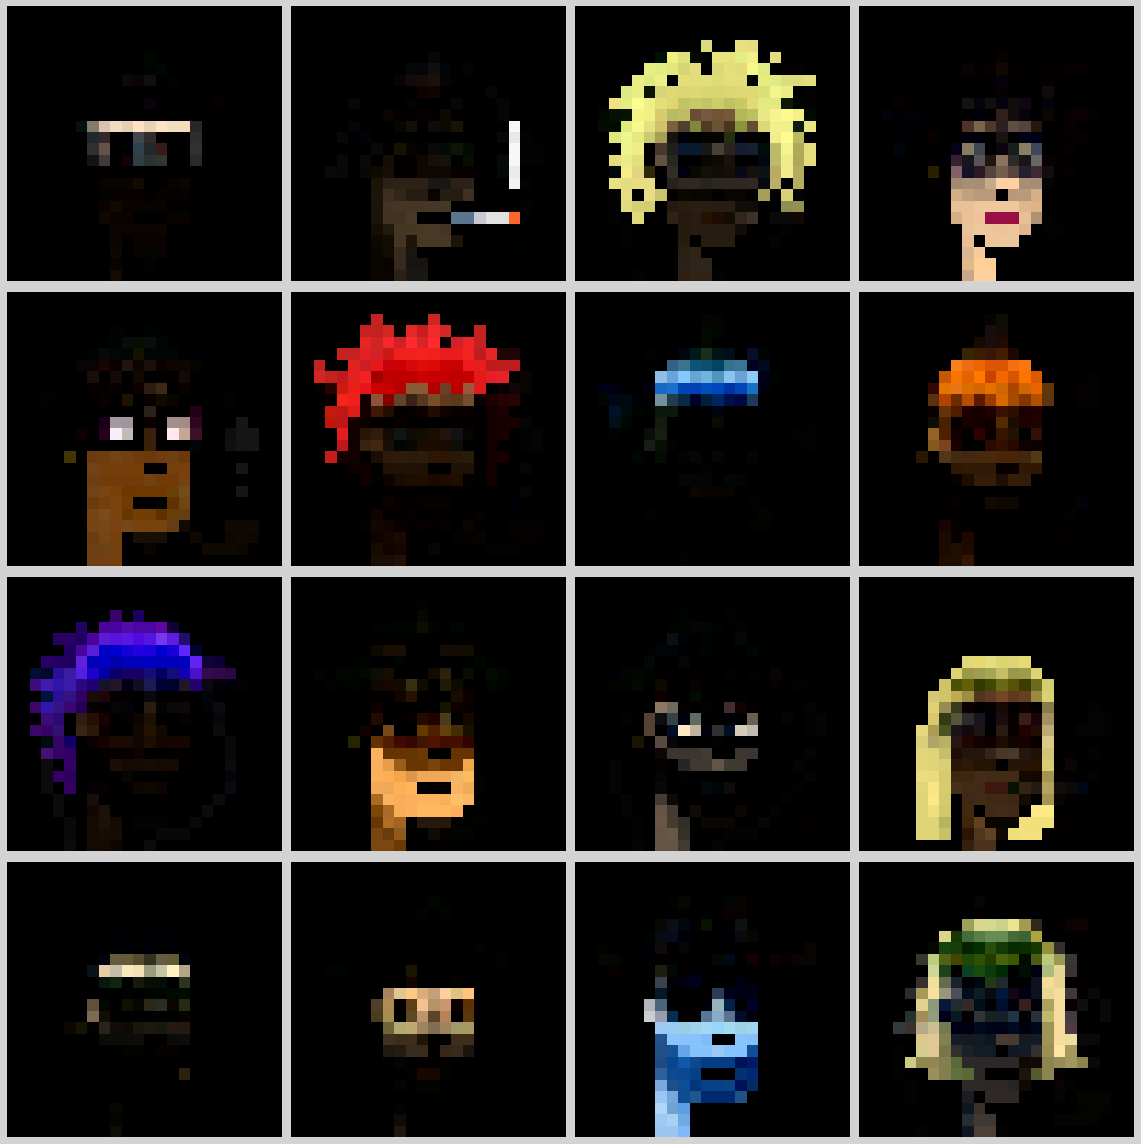

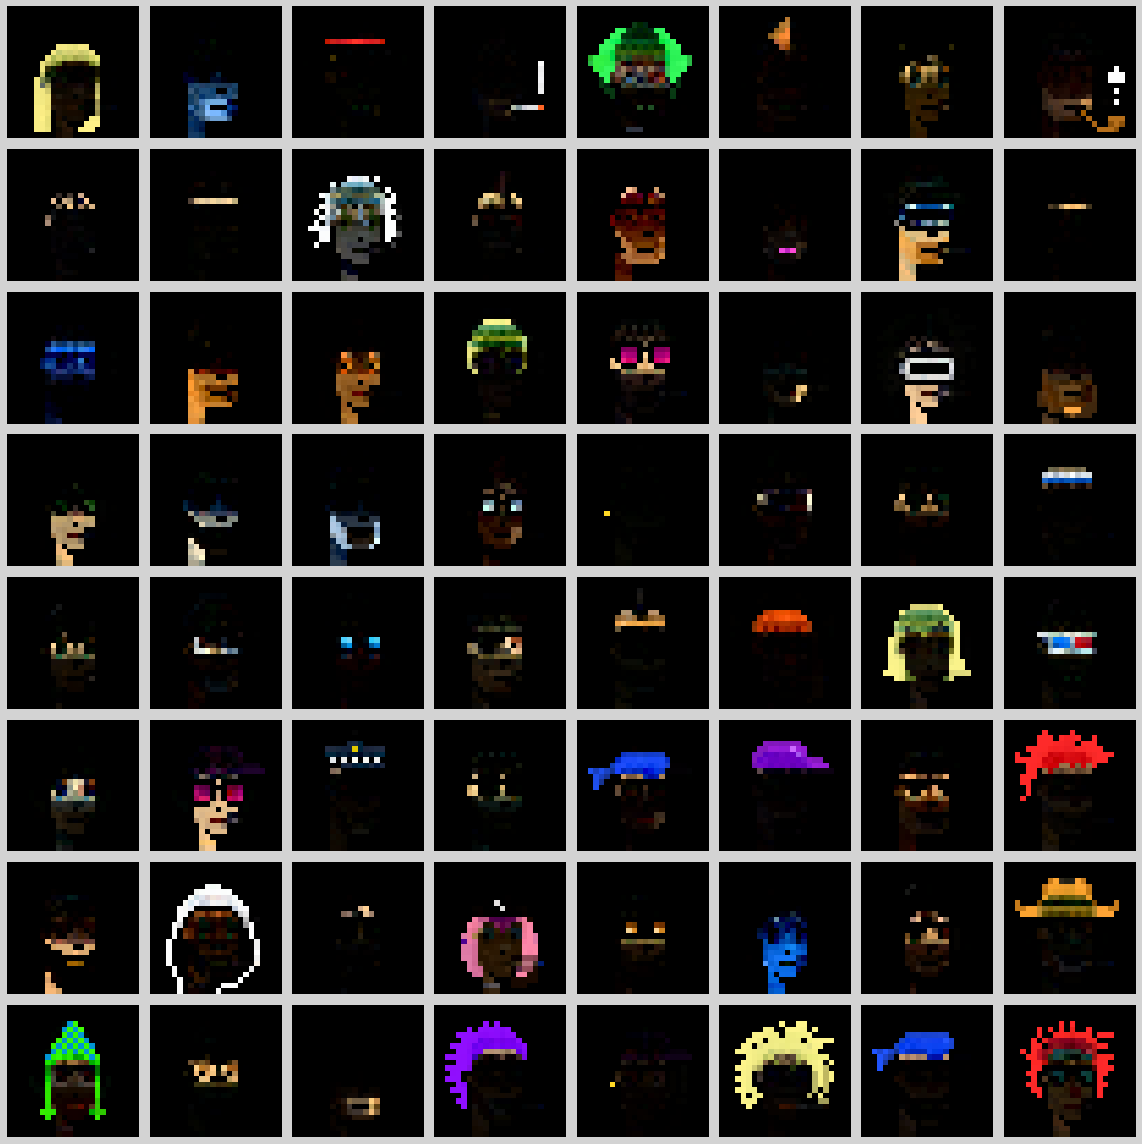

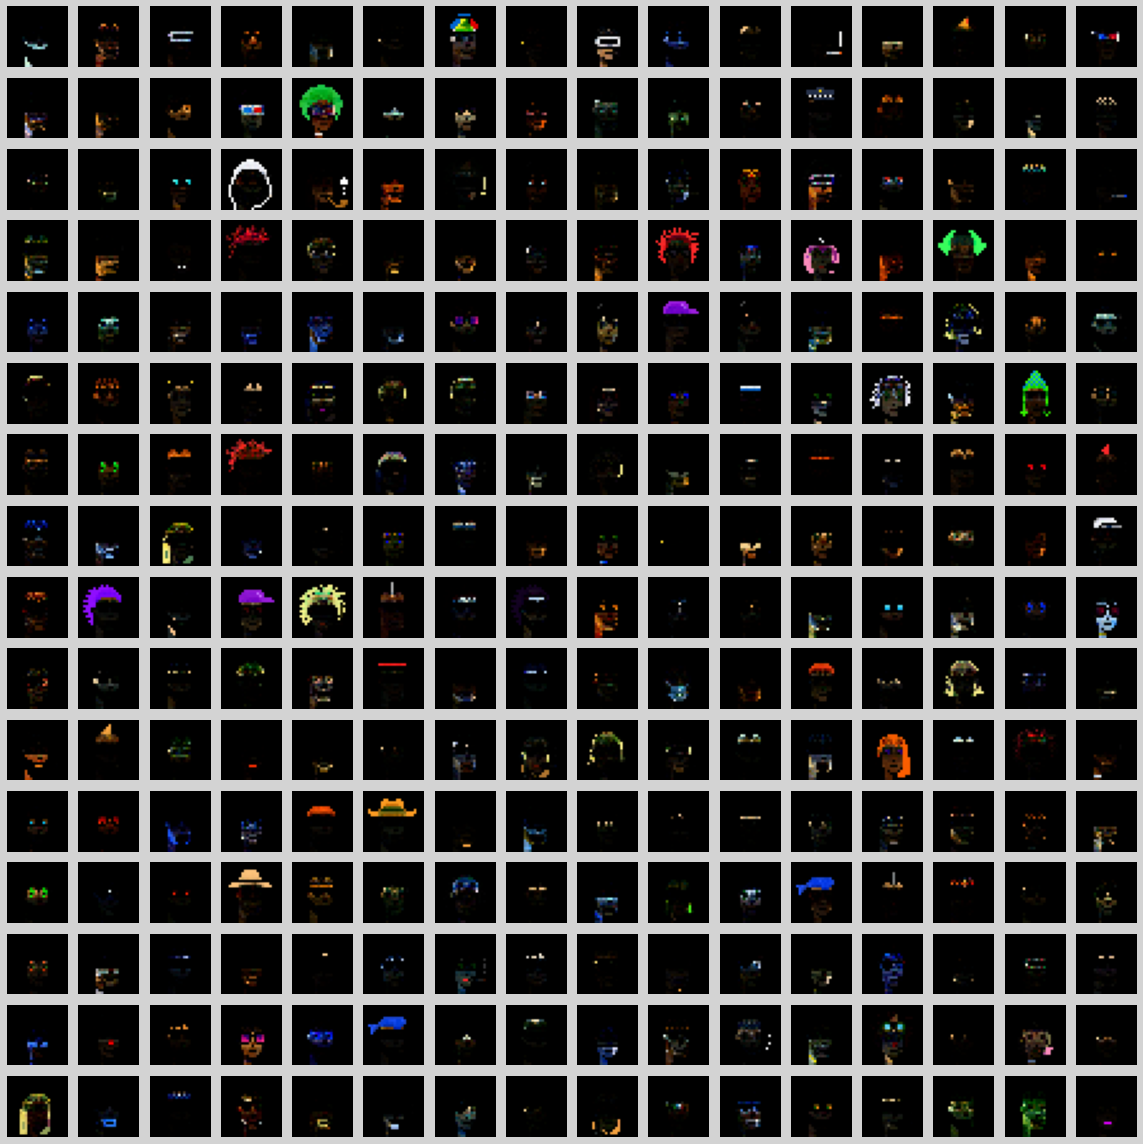

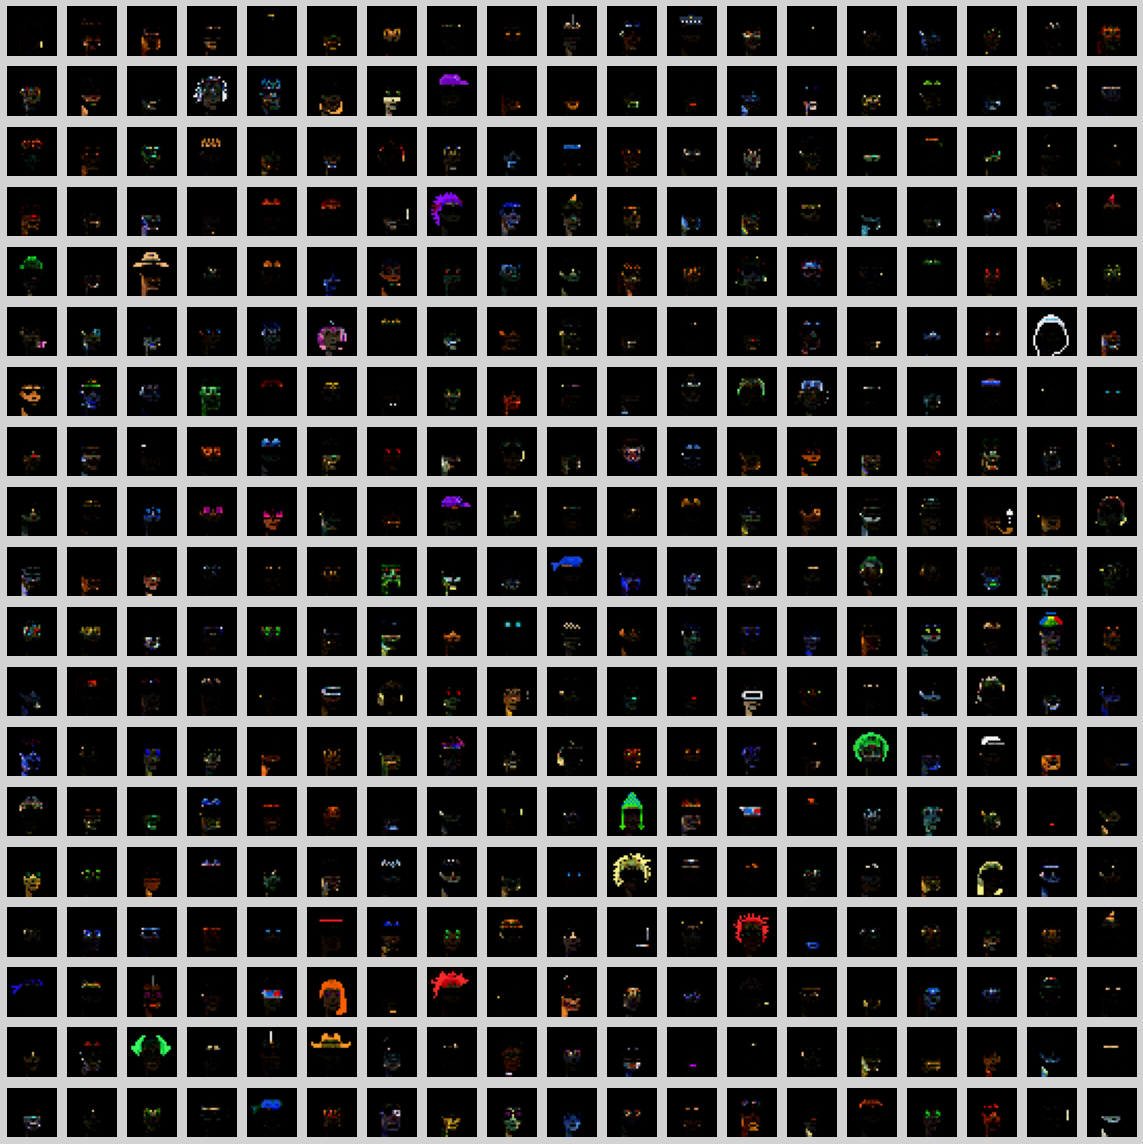

In [42]:

#Splitting the images into opacity and rgb channels
faces_opacity = faces[:,:,3,:]
faces_rgb = faces[:,:,:3,:]
shape = faces_rgb.shape

opacity_shape = faces_opacity.shape

# Clever reshape "trick". This is the matrix we will apply the NMF to
faces_reshaped = faces_rgb.reshape(np.prod(shape)//N, N)

def capture_feature(V = faces_reshaped, d=64, delta = 1e-9, maxiter = 1000, seed = 0, name=""):   
    
    #Applying the NMF
    W_2c, H_2c, norms_2c = NMF(V=faces_reshaped, d=d, delta = 1e-9, maxiter = 1000, seed = 0, name="")
    
    W_2c = W_2c.reshape(24,24,3,d) #Reshaping vector W so it fits to the plot-function
    
    WH = W_2c@H_2c #Used for reshaping of 2d)
    
    faces_with_opacity = np.zeros(faces.shape) #Creating a new array with the same shape as faces
    faces_with_opacity[:,:,:3,:] = WH.reshape(faces_rgb.shape) #Adding the three color channels
    faces_with_opacity[:,:,3,:] = faces_opacity #Adding the opacity channel
    
    WH_2c = np.copy(faces_with_opacity) #Used to plot in 2d)
    
    
    return W_2c, H_2c, WH_2c


W_2cd2, H_2cd2, WH_2cd2 = capture_feature(V=faces_rgb, d=16, delta=1e-9, maxiter=1000, seed=0, name="")
plotimgs(W_2cd2, 4, rescale = True, filename="2c.png")     #Plotting the features

W_2c, H_2c, WH_2c = capture_feature(V=faces_rgb, d=64, delta=1e-9, maxiter=1000, seed=0, name="")
plotimgs(W_2c, 8, rescale = True, filename="2c.png")     #Plotting the features

W_2cd1, H_2cd1, WH_2cd1 = capture_feature(V=faces_rgb, d=256, delta=1e-9, maxiter=1000, seed=0, name="")
plotimgs(W_2cd1, 16, rescale = True, filename="2c.png")     #Plotting the features

W_2cd3, H_2cd3, WH_2cd3 = capture_feature(V=faces_rgb, d=361, delta=1e-9, maxiter=1000, seed=0, name="")
plotimgs(W_2cd3, 19, rescale = True, filename="2c.png")     #Plotting the features



As we can see in the plot above the images no longer contain faces, but solely unique components of the original images. 
The reason for that is that we have plotted the $W$ matrix after using the Non-negative Matrix Factorization method (NMF). This is possible because we have represented each image as a vector, and several images as several vectors. The original images have been decomposed into a combination of two non-negative vectors, or in this case; other images. The columns of the $W$ matrix will represent different clusters. The images we observe in the plot are the basis vectors for the range of the original matrix with the information of the original images. That means that different combinations of these will give us the original matrix.


All of the images have black backgrounds. This is due to the fact that the opacity channel is removed before using the NMF, and the opacity channel has not been reappended to the vectors. As a result of no opacity channel, the background is black in the plot.  

We have plotted for $d = 16$, $d = 64$, $d = 256$ and $d = 361$. There are clearly some differences when using different values of d. For $d = 16$, you can see that the images mostly contains whole faces. This can be explained because we have chosen such a low value for d, and therefore there must be fewer basis vectors. However, they still have to represent the same amount of images, and for that reason each basis vector needs to contain a lot of information. As we can see in the plots above; the basis vectors change when we increase the value of d; we have d basis vectors. Then we have more basis vectors to express the same amount of images; that means that each basis vector can contain less information than with a lower value of d. This is something you can observe in the plots; the plot with $d = 361$ contains a lot more basis vectors that show small details than the plot with $d = 16$. 

The choice of using $d = 361$ was not a random one. In task 2b we found the mean of all images as well as the rank of $A$. The rank is the number of linearly independent column vectors in the matrix $A$. So, if the number of columns is bigger than the rank of $A$, then the redundant vectors are simply linear combinations of the linearly independent columns vectors. Therefore, if we let the value of d be equal to the rank of $A$, then we would have d basis vectors which is just as many as there are linearly independent column vectors in $A$. This would be optimal due to the fact that we could express every linearly independent column vector in $A$ in our matrix W without any excess information. One could use a d higher than the rank as well, and could therefore probably get better results. But, whether or not it is worth having a longer runtime for results that might not be significantly better is something we will look into later.  


#### Task 2d

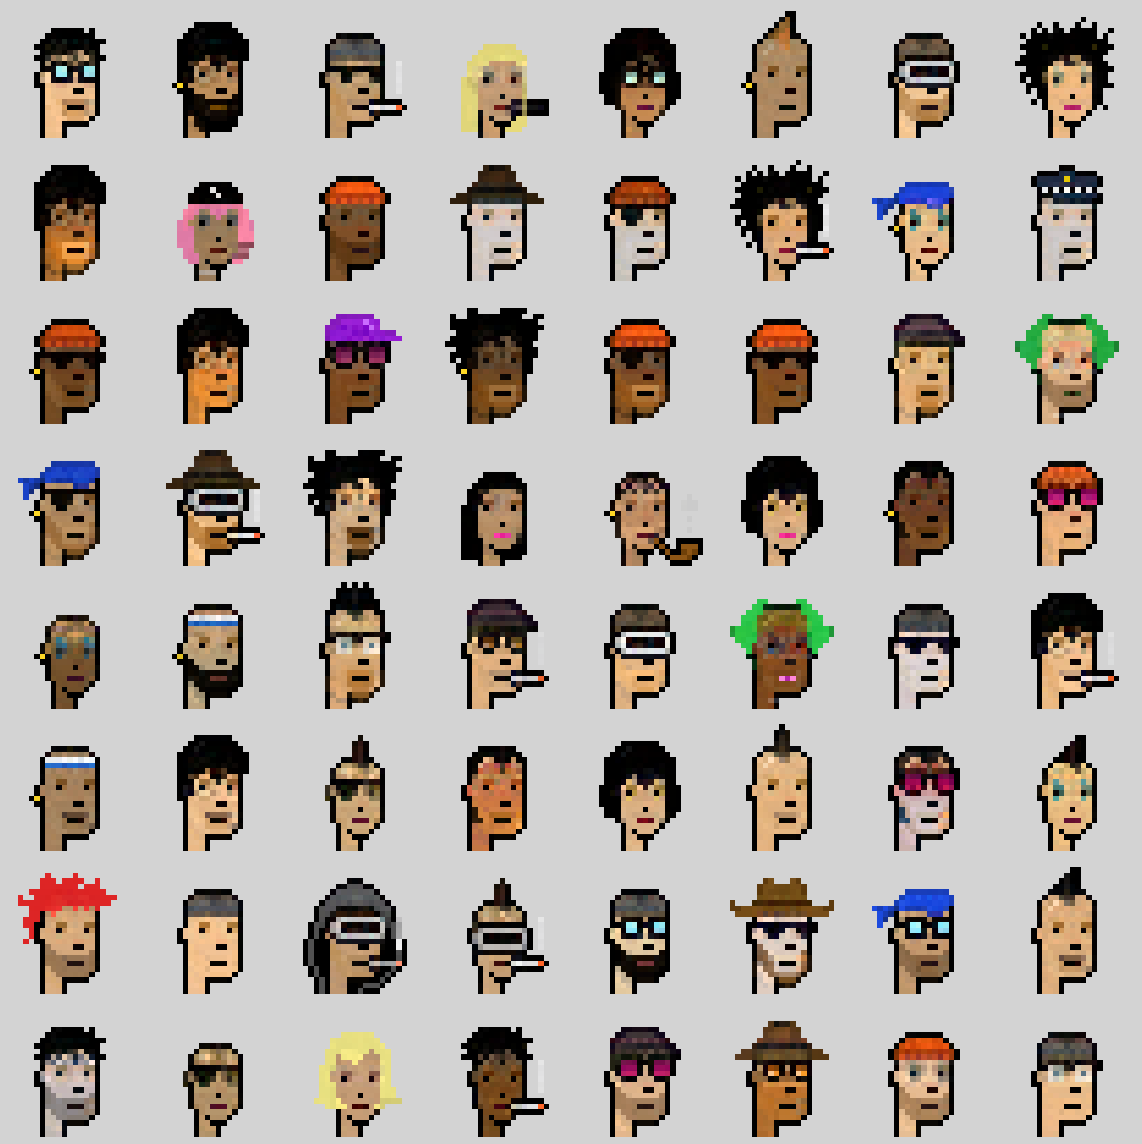

In [43]:

#Remaking the cryptopunks
plotimgs(WH_2c, 8, rescale = True, filename="2d.png")


In the plot above we can observe the 64 reconstructions $WH$ corresponding to the plot from earlier in the project. In other words, what we can observe here is $A_{NMF}$. As one can see, the CryptoPunks have the same positions in the plot as earlier, but they do not look exactly the same. This plot is of the reconstruction, and $A_{NMF} \approx A$. The images have therefore gained some noise or lost some information. This is especially easy to observe when looking at the skin of the CryptoPunks, as all the pixels in the face of each CryptoPunk no longer have the same color. 

Some of the image components may have changed a bit. This can happen due to disturbances or if some of the CryptoPunks have similar image components. If the image components are similar, the NMF might have some trouble with distinguishing them from one another. An example of this is the man at (5,6), he had originally only green hair, but has now also gotten hints of cinema glasses and pink lipstick. The recreating prosess had a hard time distinguishing between the different elements in this area.

Another point that should be discussed is whether or not all the features of the images are equally well reconstructed. It seems as if the smaller image components are more often lost than the image components that contains more pixels. It also depends on where the image component are positioned. If a small component is positioned in an area where a lot of other image components could be positioned in other CryptoPunks, the small component seems more likely to be lost. An example of this is the earring some of the CryptoPunks have. The earring does not seem to be lost as easily as for example a mole or a clown nose. However, the clown nose and a mole are positioned in an area where a lot of image components are positioned in other CryptoPunks, and therefore it is easier to lose them when using the NMF. We see several examples of this, at position (2,1), (3,2) and (4,8).


#### Task 2e  

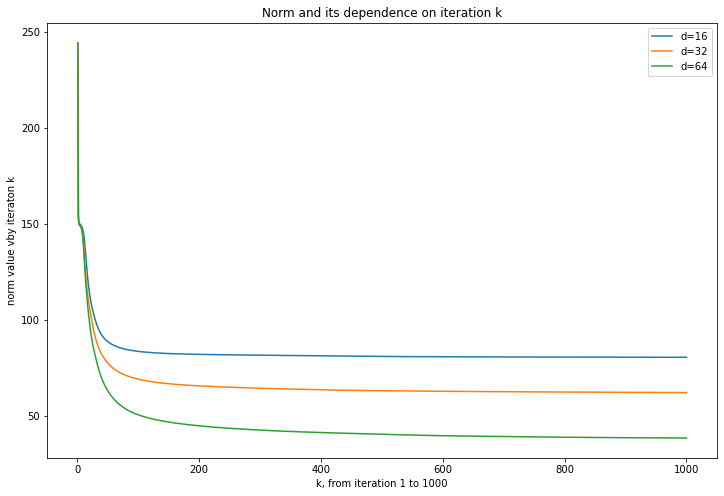

In [44]:

d_list = [16,32,64]                        #different d-values
norms_2e_list = np.zeros(len(d_list))      #Saves the last norm value for plotting later

k_values = np.arange(1,1001)               # maxiter=1000, so k-values represent each iteration k

plt.figure(21)
for i in range(len(d_list)):
    #Applying NMF
    W_2e, H_2e, norms_2e = NMF(V=faces_reshaped, d=d_list[i], delta = 1e-9, maxiter = 1000, seed = 0, name="")
    plt.plot(k_values, norms_2e, label=f"d={d_list[i]}")       # Plotting the norm values for all k iterations
    norms_2e_list[i] = norms_2e[-1] 
plt.title("Norm and its dependence on iteration k")
plt.xlabel("k, from iteration 1 to 1000")
plt.ylabel("norm value vby iteraton k")
plt.legend()
plt.rcParams["figure.figsize"]=(12,8)
plt.show()


d-values: [16, 32, 64]
Last norms: [80.40260579 62.02646868 38.32332171]


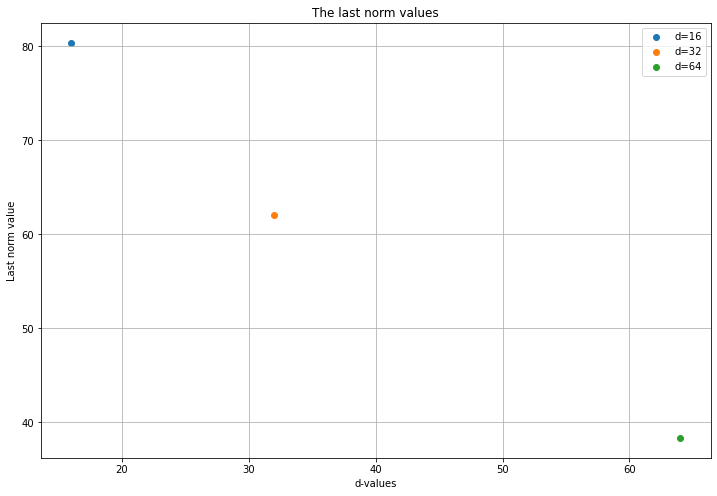

In [45]:
 
d_list = [16,32,64]
print(f'd-values: {d_list}')
print(f'Last norms: {norms_2e_list}')

plt.figure(22) 
for j in range(len(d_list)):
    plt.scatter(d_list[j], norms_2e_list[j], label=f'd={d_list[j]}')
plt.title("The last norm values")
plt.xlabel("d-values")
plt.ylabel("Last norm value")
plt.rcParams["figure.figsize"]=(12,8)
plt.legend()
plt.grid()
plt.show()


In the first plot we see how the Frobenius norm $\lVert A - W_kH_k \rVert_F$ changes for each iteration $k$. The plot shows the Frobenius norm for three different values of $d$. We can see that the norm converges for all three values of $d$, but some better than others. All three values of $d$ seem to converge at the same rate, but it is obvious that the higher the value of $d$ is, the lower convergence value. For $d = 16$ it converges at 82.60993184, for $d = 32$ it converges at 62.12345798 , and for $d = 64$ it converges at 37.89756072 after 1000 iterations. The results seem reasonable due to the magnitude of the dataset. 


#### Task 2f

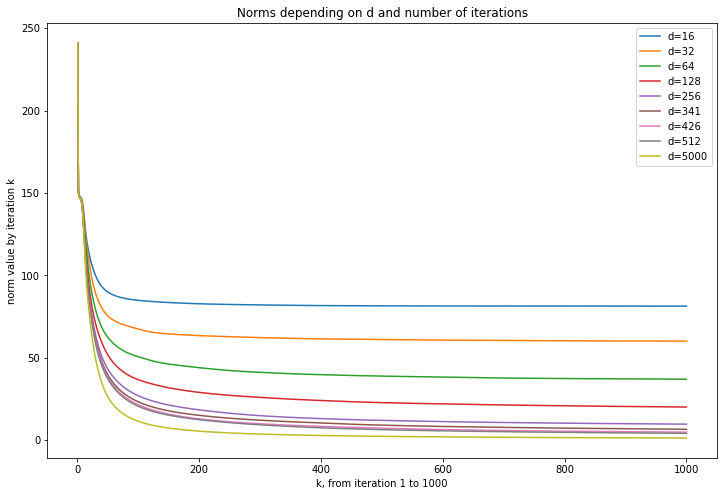

In [ ]:

d_list = [16,32,64,128,256,341,376,426,512, 5000]               #wide range of d
norms_2f_list = np.zeros(len(d_list))         #Saves the last norm value for plotting later

k_values = np.arange(1,1001)                  #maxiter=1000, so k-values represent each iteration k

dataAmountIncreases =  np.zeros(len(d_list))
x = np.zeros(len(dataAmountIncreases))

plt.figure(23)
for i in range(len(d_list)):
    # Applying NMF 
    W_2f, H_2f, norms_2f = NMF(V=faces_reshaped, d=d_list[i], delta = 1e-9, maxiter = 1000, seed = 0, name="")
    plt.plot(k_values, norms_2f, label=f"d={d_list[i]}")       # Plotting the norm values for all k iterations  
    norms_2f_list[i] = norms_2f[-1]

plt.title("Norms depending on d and number of iterations")
plt.xlabel("k, from iteration 1 to 1000")
plt.ylabel("norm value by iteration k")
plt.rcParams["figure.figsize"]=(12,8)
plt.legend()
plt.show()


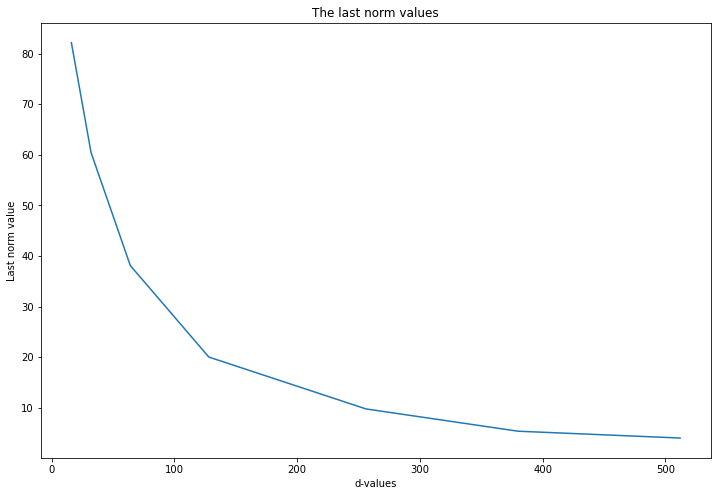

In [ ]:

plt.figure(24)
plt.plot(d_list, norms_2f_list, label=f'd=d_list)')
plt.title("The last norm values")
plt.xlabel("d-values")
plt.ylabel("Last norm value")
plt.rcParams["figure.figsize"]=(12,8)
plt.show()



Here we have used the NMF for a wide range of $d$, and calculated the Frobenius norm $\lVert A - W_kH_k \rVert_F$. As we can see from the plot, the higher the value of $d$ is, the better the norm converges. However, as the value of $d$ grows, the value the norm converges to does not change as much as for smaller values of $d$. This can be observed in the second plot as well. It shows that when $d$ is small, the value of the Frobenius norm after 1000 iterations changes rather quickly. As the value of $d$ increases, the value of the Frobenius norm does not change as quickly as before. This result is as expected due to what we have learned from earlier parts of the project with amounts of data and the rank of the matrix.

As $d$ increases so does the sizes of $W$ and $H$. After a certain point, the amount of data in $W$ and $H$ combined will be larger than the original matrix $A$. The Frobenius norm is a measurement of calculating the error between the original matrix $A$ and the reconstructed $WH$, which is an approximation of the original matrix $A$. From task 2b, we have found that the rank of $A$ is 376. Now we are able to observe that for $d = Rank(A)$ is the best value of $d$. This is because in our dataset of 500 images of CryptoPunks, where some share similarities with same elements and features. Since each element or feature on a CryptoPunk can be considered a non-zero eigenvalue, it proves that there are 376 different features among the 500 images. We know that $d$ determines the number of columns in the vector $W$, and $W$ being the basis vectors containing all the elements, it is reasonable that increasing $d$ higher than the rank value would not result in a noticeable improvement in the norm value. This can also be observed from our plot above, where the difference between the convergence values of the norm are very small for the d-values above the rank value. 


# Task 3 

We will now take a look at denoising. Noise is irregularities that is not supposed to be in our image. Denoising is a method to clean up an image and correcting irregularities. 

First, we are going to add noise to our CryptoPunks, which means that incorrect colors and values are added to some of the pixels. $A_{noisy} = A + \sigma E$ is used to create the new image with noise. $A$ is the original matrix and then we add a scalar value $\sigma$ of $E$ to this matrix. $E$ is a matrix of the same size as $A$ that contains different and random values between 0 and 1 on random places. This results in a noisy matrix $A_{noisy}$ that includes some new values depending on the value $\sigma  \in <0,1>$. The next step is to use the NMF-method and capture the features that is repeated among our CryptoPunks. As we did previously, we will recreate our CryptoPunks using the features and the NMF-method since $A \approx W \cdot H$ where $W$ contains our features. 

The results we get after the recreation will hopefully be less noisy than the initial plot we started with. Our method will save the features as a mean. The mean will overlook many irregularities in the faces and a recreation will hopefully include less noise. This result depends on our $d$-value, the number of columns in $W$. When we did not have noise, the difference between the original $A$ and the resulting matrix decreased. Now that we have noise, the value of $d$ can have an important impact on the result since it can be the determining factor which makes the image signal more important than the noise.

The fitting of the data can result in very different results. Overfitting is when the method manages to note all the details of a matrix or image. Underfitting on the other hand do not manage to capture the complexities of the data and the result is leaning towards a mean rather than a detailed result. 

This process can be useful in multiple realistic examples. For example, if you take a picture in a low-light setting, it is too dark to get a good resolution on your image, this method can help clear up the image. Some of the small details may get lost, but overall, the picture will be clearer from the denoising. The same applies for old cameras or cameras with lower resolution than desired. Using the NMF on your computer can help in achieving a better image.

#### Task 3a 

Noisy faces shape: (1728, 500)
Norm of noisy faces and the reshaped: 41.89822299104053


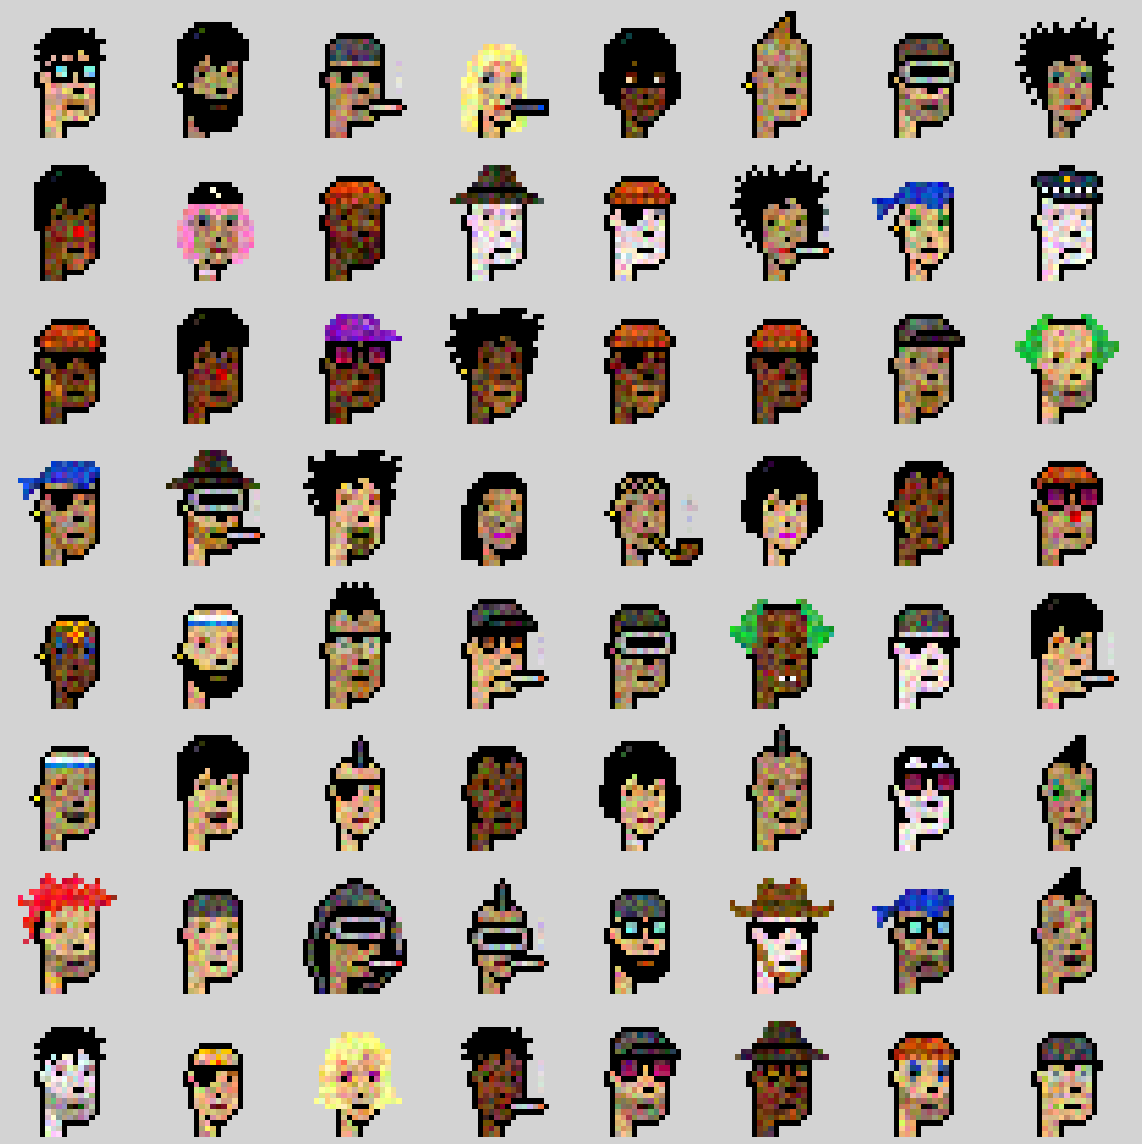

Noisy faces shape: (24, 24, 4, 500)
Faces reshaped shape: (1728, 500)
frob_noise=  41.89822299104053


In [46]:

def add_noise(imgs_reshaped, sigma = 0.1):
    """
    Adds gaussian noise to images as described in text.
    Note that imgs must be given as a (24*24*3, N) numpy array, i.e the reshaped images
    Input:
        imgs_reshaped: (1728,N) numpy array
        sigma: scalar, noise level
    Output:
        noisy_faces: (1728,N) numpy array containing noisy images
    """
    # Noise level
    sigma = 0.1

    # Array that will store the rgb channels of the noisy images
    noisy_faces = np.copy(imgs_reshaped)

    # Number of noisy values we need
    nnzero = faces_reshaped[np.nonzero(imgs_reshaped)].shape[0]

    # Sample noisy values and add noise
    noise = np.random.normal(0.0,1,nnzero)
    noisy_faces[np.nonzero(imgs_reshaped)] += sigma*noise

    # Clip to lie between 0 and 1 so that we can still interpret them as images
    noisy_faces = np.maximum(0.0,np.minimum(1.0, noisy_faces))

    return noisy_faces


noisy_faces = add_noise(faces_reshaped)
print(f'Noisy faces shape: {noisy_faces.shape}')

# Calculate the error of the noisy images
noise_residual = np.linalg.norm(noisy_faces - faces_reshaped) 
print(f'Norm of noisy faces and the reshaped: {noise_residual}')

# For plotting noisy images we add the opacity
noisy_faces_with_opacity = np.zeros(faces.shape)
noisy_faces_with_opacity[:,:,:3,:] = noisy_faces.reshape(faces_rgb.shape)
noisy_faces_with_opacity[:,:,3,:] = faces_opacity
plotimgs(noisy_faces_with_opacity)

print(f'Noisy faces shape: {noisy_faces_with_opacity.shape}')
print(f'Faces reshaped shape: {faces_reshaped.shape}')


frob_noise= np.linalg.norm(noisy_faces - faces_reshaped, 'fro')
print("frob_noise= ", frob_noise)



We use $\sigma = 0.1$ as the factor to add noise on random places in the image of our CryptoPunks. As previously mentioned, we randomly select $N = 500$ faces and then we plot $64$ resulting faces after noise is added. Clearly there has been added noise to the faces of the CryptoPunks since no pixels share the same value/color with their neighboring pixels. The Frobenius norm, $|| A_{noisy} - A||_{F}$ is the difference between the original faces and the noisy faces and resulted in 41,8395. This is quite a large value, which indicates there is clearly a difference after we have added noise.


#### Task 3b 

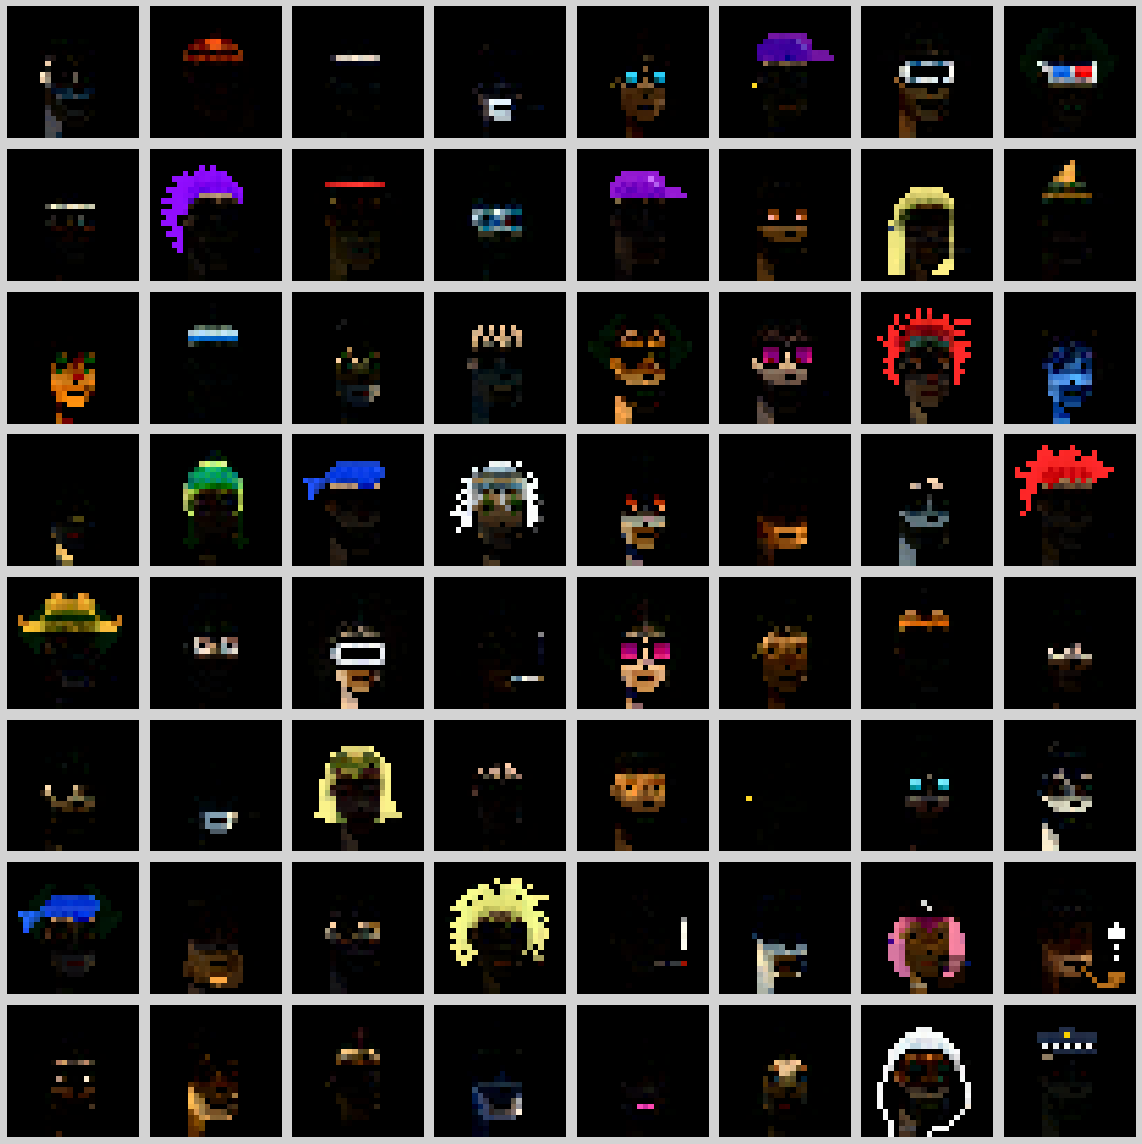

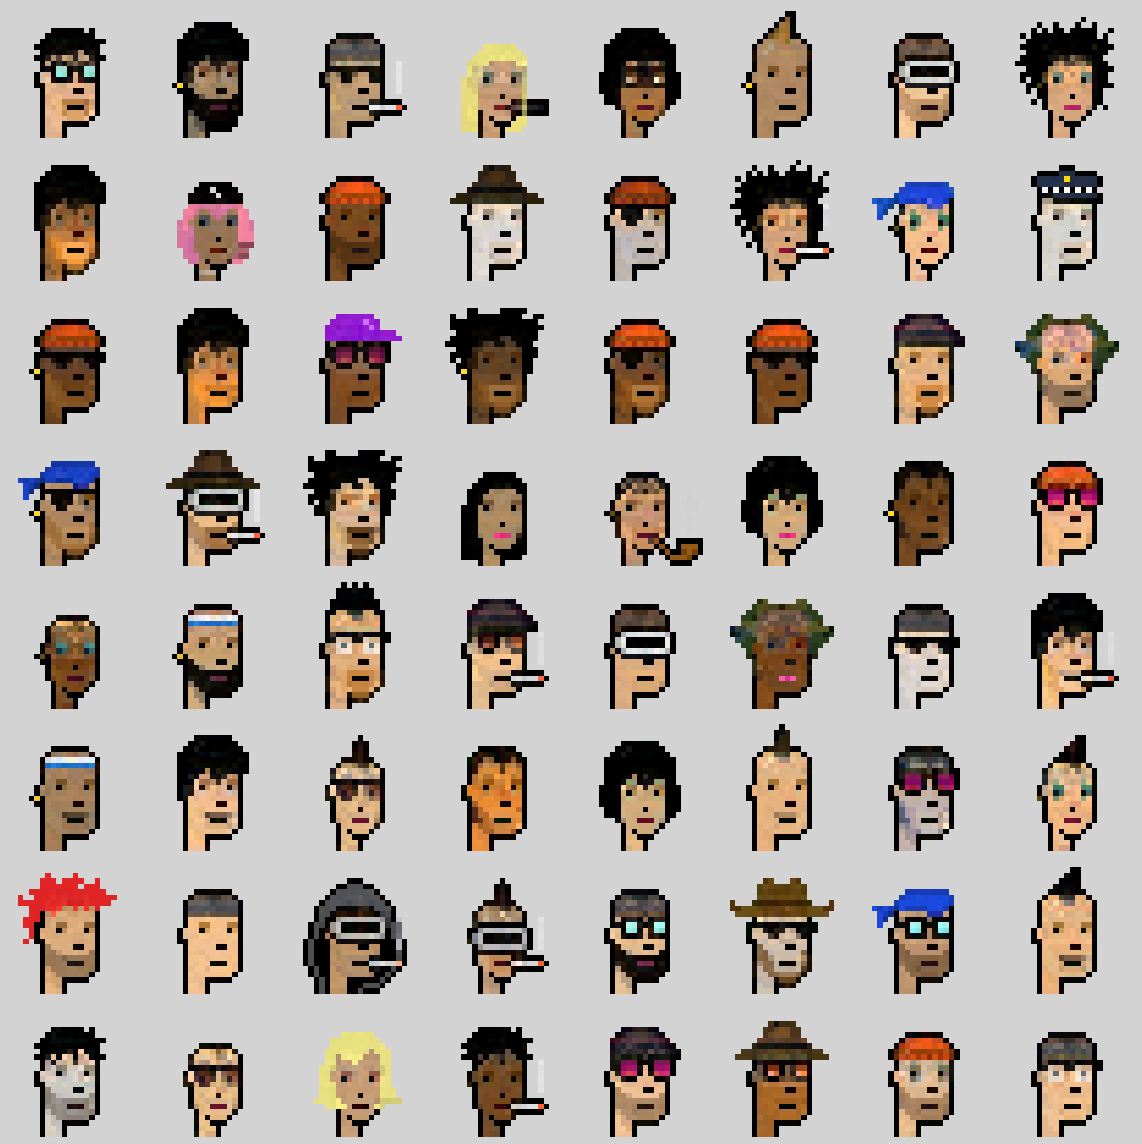

In [47]:

W_3b, H_3b, WH_3b = capture_feature(V=noisy_faces, d = 64, delta = 1e-9, maxiter = 1000, seed = 0, name="")

plotimgs(W_3b, 8, rescale = True, filename="W_3b.png")            #Plotting the features
plotimgs(WH_3b, 8, rescale = True, filename="WH_3b.png")          #Remaking the faces



First, we reuse code from previous tasks to capture the features of the noisy faces. The plot of $W$ shows us solely unique components of the original noisy images. The plot of $WH$ is the reconstruction since $A \approx W \cdot H$. As anticipated, the reconstruction is less noisy than the original noisy images. They are now very similar to the faces we reconstructed in task 2 and they are significantly less noisy compared to the original noisy images. 

The plot of $W$ now compared to the previous $W$ in task 2 is clearer and lighter. Without noise the features were darker. Now it also seems as if the features have captured more individual faces than in task 2. This is probably because the features that our faces now share is different anyway because of the noise that disturbs. $W$ saves as much info that it can about a face as a result of this.

The reconstruction of $A$ is very similar in these two tasks. With noise, the images are a bit lighter since the features were brighter. The color white is difficult to recreate. White has a pixel value of zero. So, when we add a noise value, it will be difficult to go back completely to zero. We capture this in the men that originally had pale skin. In the result from the noisy images, their faces is closer to gray. When it comes to noise, the resulting images are very, very similar. The reconstructions are so similar when it comes to noise that we are not able to choose the better one on this area.


#### Task 3c

In [48]:

def NMF_noise(V=noisy_faces, d=1, delta = 1e-9, maxiter = 1000, seed = 0, name="", printe=False, original_A=faces_reshaped):
    """
    input:
        V: (m,n) input array
        d: integer, Number of components we want to decompose V into, the number of colomns in W
        delta: float, small number for safe division so we do not get division by zero
        maxiter: integer, maximum number of iterations
        seed: integer, random seed
        name: to easier describes what we are printing
    output:
        W: (m,d) array
        H: (d,n) array
        norms: array containing the norm of each iteration
    """

    if seed != 0:                               #If the initialized seed is different from 0, it will get a new random value
        seed = np.random.seed(seed)
    """
    Elementwise product, Hadamard - we use *
    The matrices must be of the same shapes for it to work
    Elementwise division, Hadamard - we use /
    For matrix multiplicaton - we use @ or np.dot()
    """
    m = np.shape(V)[0]                                                #Number of colomns in matrix V
    n = np.shape(V)[1]                                                #Number of rows in matrix V
    
    #Initialize W_0 and H_0 to positive matrices
    scale = np.sqrt(np.mean(V)/d)                                     #To scale the matrices
                                                      #Initilizes W_0 to include random numbers between 0 and 1 in a matrix mxd
    W_0 = (np.random.uniform(0.0+delta, 1.0, m*d)).reshape(m, d)  
                                                      #Initilizes H_0 to include random numbers between 0 and 1 in a matrix dxn
    H_0 = (np.random.uniform(0.0+delta, 1.0, d*n)).reshape(d, n)      

    W_0 = W_0*scale                                                   #Scaling W_0
    H_0 = H_0*scale                                                   #Scaling H_0

    H_k = np.copy(H_0)                                                #Copying initialized value so the original does not change
    W_k = np.copy(W_0)                                                #Copying initialized value so the original does not change
    
    norms = np.zeros(maxiter)                                         #To save the norm of each iteration in an array
    norms_noise = np.zeros(maxiter)                                   #To save the norm of each noise iteration in an array
    
    frob0 = np.linalg.norm(V - np.dot(W_0, H_0), 'fro')               #Frobenius norm of intialized values
    norms[0] = frob0                                                  #Add the norm for this iteration to our array
    
    frob0_noise = np.linalg.norm(original_A - np.dot(W_0, H_0), 'fro') #Frovenius norm of intialized values for noise
    norms_noise[0] = frob0_noise                                       #Add the first norm for this iteration to our array
    
    for k in range (1, maxiter):                                      #We do a chosen number of iterations
        W_k_tran = np.transpose(W_k)                                  #Transpose W to be used in the next value for H

        H = ( H_k* ((W_k_tran@V)) ) / ((W_k_tran@W_k@H_k))            #The next value for H
        H = np.where(H == 0, delta, H)                  #If any elements in H are zero, we add a deltavalue to prevent problems
        H_tran = np.transpose(H)                                      #Transpose H to be used in the next value for W

        W = ( W_k * ((V@H_tran) )/ ((W_k@H@H_tran)))                  #The next value for W
        W = np.where(W == 0, delta, W)                  #If any elements in W are zero, we add a deltavalue to prevent problems

        

        H_k = np.copy(H)                                              #the "previous" iteration in the next iteration
        W_k = np.copy(W)                                              #the "previous" iteration in the next iteration

        frob = np.linalg.norm(V - np.dot(W, H), 'fro')                #Frobenius norm
        norms[k] = frob                                               #Add the norm for this iteration to our array

        frob_noise = np.linalg.norm(original_A - np.dot(W, H), 'fro') #Frobenius norm 
        norms_noise[k] = frob_noise                                   #Add the norm for this iteration to our array
        

    WH = W@H                                               #Finds the matrix mulitplication of W and H that is approximatly A

    frob = np.linalg.norm(V - np.dot(W, H), 'fro')                    #Finds the last norm to plot it 
    
    if printe is not False:
        print(f'Matrix {name}\n A: \n {V} \n W: \n {W} \n H: \n {H} \n WH: \n {WH} \n Frobenius norm: \n {frob} \n')

    return W, H, norms, norms_noise


We recreate the NMF algorithm to suit our purpose in this task. The approach is mostly the same as before, but now we have also added another norm. Now we have the opportunity to send in two matrices in the algorithm and find the norm of these after each iteration of updating $W$ and $H$.

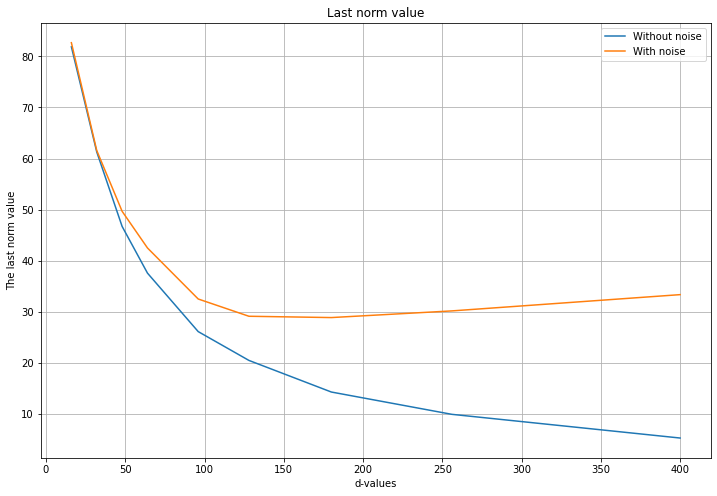

In [ ]:

d_list = [16,32,48,64,96,128,180,256,400]             #d values

norms_noise_3c_list = np.zeros(len(d_list))      #To save the last norm value

norms_2f_list = np.zeros(len(d_list))            #Saves the last norm value for plotting later

for i in range(len(d_list)):
    #Applying NMF for faces with noise
    W_3c, H_3c, norms_3c, norms_noise_3c = NMF_noise(V=noisy_faces, d=d_list[i], delta = 1e-9, maxiter = 1000, seed = 0, name="", original_A=faces_reshaped)
    norms_noise_3c_list[i] = norms_noise_3c[-1]  #Saving the last norm value
    
    W_2f, H_2f, norms_2f = NMF(V=faces_reshaped, d=d_list[i], delta = 1e-9, maxiter = 1000, seed = 0, name="")
    norms_2f_list[i] = norms_2f[-1]

#Comparing the NMF method and norms to the faces with and without noise
plt.figure(31)
plt.plot(d_list, norms_2f_list, label="Without noise")
plt.plot(d_list, norms_noise_3c_list, label="With noise")
plt.title("Last norm value")
plt.xlabel("d-values")
plt.ylabel("The last norm value")
plt.rcParams["figure.figsize"]=(12,8)
plt.legend()
plt.grid()
plt.show()


The reconstruction error is the Frobenius norm $|| A - W H||_{F}$. For each value in our list of d-values, we recover these norm values both for matrices with noise and no noise in two arrays that we later plot together in the same plot to compare them. When there is no noise added to the images, an increase in d-value decreases the norm value. This means that when the columns in $W$ increases in number, the reconstructed matrix $A \approx W \cdot H$ are more and more similar to the original $A$. 

The more columns, the more data $W$ and $H$ contains. We discussed this before in task 1e. The NMF method is smart to save the amount of data we work with. An increase in $d$ leads to more data, more than what may be necessary to yield a good result. If the d-value creates a $W$ and a $H$ combined that includes more data than the original $A$, the method is unnecessary. As the d-value approaches 400-500, the reconstruction of the image without noise gets close to 0, which means the reconstruction is almost the same as the original image.

Now we take a look at the resulting norms for the reconstruction of the image with noise. The error ((between the constructed A and the original A without noise)) develops as a U or an L with a negative extreme point at around $d = 128$. This value is the best fit for reconstructing the image of the noisy faces, the value that gives a resulting matrix that is the most similar to the original non-noise matrix A. After this value for $d$, the error flattens and then increases again. 

This development is related to overfitting and underfitting which we introduced in the beginning of task 3. When the value for $d$ is smaller than $d=128$, we get underfitting. When underfitting occurs, we do not manage to capture the complexities of the data and the result leans towards a mean rather than a detailed result. The small details here and there are missed. But as d increases, more of these small details are recreated. This also applies for the result from the images without noise. However, overfitting occurs for the images with noise after $d=128$. Overfitting is when the method manages to note all the details of a matrix or image. In this case, it means that we manage to recreate the noise, which is unwanted. Therefore, the error increases again when we compare the overfitted reconstruction to the original $A$ that does not have noise.

#### Task 3d

## Conclusion 

In this project we have applied the NMF to different situations. In the beginning we looked at some small matrices, and calculated the Frobenius norm after applying the NMF. In addition, we discovered that when increasing the value of d for two matrices, $A_3$ and $A_4$, then the value of the Frobenius norm decreased. And, when the norm has a small value it implies that the reconstruction was more accurate and similar to the original matrix $A$. This was a reasonable result since the value of d determines the number of columns in the matrix $W$ and rows in $H$, which contains information about the original matrix. 

In the second part of the project we looked at a dataset containing 500 images. When we applied the NMF to the dataset, we found the basis vectors in the matrix $W$ as different facial features or accessories of the CryptoPunks. Some examples of these are different hairstyles, lip colors, hats or a cigarette. Furthermore, we found that by changing the value of d, it affected the detail of the different image components. If the d had a rather low value, then there were fewer basis vectors containing the same information as before. That lead to the images containing as much information as a whole face instead of a single element. If the value of d was somewhat similar to the rank of $A$, then the images mostly contained unique elements, and the Frobenius norm was lower. We also observed that if the value of d was higher than the rank of $A$, then there were no big changes in the Frobenius norm. 

Lastly, we found that by applying the NMF to $A_{noise}$, the reconstruction $A_{NMF}$ contained less noise than $A_{noise}$. This, of course, depended of the choice of the value of d. If the value of d was around 128, then there was less noise in the reconstruction than the original. However, if the value of d was lower or larger than 128 under- and overfitting occured.

Overall, this lets us conclude that the NMF is a fine method if the value of d is chosen correctly, which depends on the original matrix $A$. 




